In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
import scipy.stats as stats
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
import time 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,classification_report,accuracy_score
from time import process_time
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings('ignore')

In [223]:
df = pd.read_csv('train_data_1.csv') #Read file one in Dataframe1

In [224]:
#Huge data taking long time to execute commands,will proceed with train_1 file only

In [225]:
#df2 =  pd.read_csv('train_data_2.csv',low_memory=False)#Read file 2 in Dataframe2

In [226]:
#df = pd.concat([df1,df2],axis=0) #concat df1,df2 into 1 dataframe

In [227]:
df.shape #Rows and columns

(270000, 45)

In [228]:
df.drop_duplicates(inplace=True) #remove duplicates valuses

In [229]:
#check for types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270000 entries, 0 to 269999
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    270000 non-null  int64  
 1   loan_amnt                    270000 non-null  int64  
 2   funded_amnt                  270000 non-null  int64  
 3   funded_amnt_inv              270000 non-null  float64
 4   term                         270000 non-null  object 
 5   batch_enrolled               173125 non-null  object 
 6   int_rate                     270000 non-null  float64
 7   grade                        270000 non-null  object 
 8   sub_grade                    270000 non-null  object 
 9   emp_title                    254375 non-null  object 
 10  emp_length                   256370 non-null  object 
 11  home_ownership               270000 non-null  object 
 12  annual_inc                   269998 non-null  float64
 13 

In [230]:
#we have int float and object type values 
#Missing values are present in may features,will analyse them further

In [231]:
#Loan status is bascically status of loan amount, 1 = Defaulter, 0 = Non Defaulters
# it is dependent feature and Int type for analysis purpose we convert it as object type
df['loan_status'] = df['loan_status'].astype('object')

In [232]:
#checking summary for continous features
df.describe().T     

,count,mean,std,min,25%,50%,75%,max
member_id,270000.0,3.500089e+07,2.413323e+07,70473.00,10859531.00,3.709728e+07,5.851962e+07,73544841.00
loan_amnt,270000.0,1.474990e+04,8.427574e+03,500.00,8000.00,1.300000e+04,2.000000e+04,35000.00
funded_amnt,270000.0,1.473627e+04,8.421907e+03,500.00,8000.00,1.300000e+04,2.000000e+04,35000.00
funded_amnt_inv,270000.0,1.469621e+04,8.434618e+03,0.00,8000.00,1.300000e+04,2.000000e+04,35000.00
int_rate,270000.0,1.324334e+01,4.379194e+00,5.32,9.99,1.299000e+01,1.620000e+01,28.99
annual_inc,269998.0,7.506215e+04,6.485241e+04,1896.00,45000.00,6.485750e+04,9.000000e+04,9500000.00
dti,270000.0,1.812804e+01,8.307225e+00,0.00,11.91,1.763000e+01,2.394000e+01,137.40
delinq_2yrs,269994.0,3.158218e-01,8.684451e-01,0.00,0.00,0.000000e+00,0.000000e+00,30.00
inq_last_6mths,269994.0,6.941821e-01,9.945832e-01,0.00,0.00,0.000000e+00,1.000000e+00,28.00
mths_since_last_delinq,131498.0,3.400375e+01,2.185186e+01,0.00,15.00,3.100000e+01,5.000000e+01,176.00


In [233]:
#summary for discrete features
df.describe(include='O').T


,count,unique,top,freq
term,270000,2,36 months,188962
batch_enrolled,173125,103,BAT2252229,9375
grade,270000,7,B,77301
sub_grade,270000,35,B3,17166
emp_title,254375,107741,Teacher,4089
emp_length,256370,11,10+ years,88685
home_ownership,270000,6,MORTGAGE,134347
verification_status,270000,3,Source Verified,100272
pymnt_plan,270000,2,n,269995
desc,38379,36115,> Debt consolidation<br>,289


In [234]:
print(df.describe(include='O').loc['unique'][df.describe(include='O').loc['unique']>100])
# we will drop these features as they have too many unique values 
#also we have addr_state to represent zip_code
#purpose which has same significance as of title
#batch_enroled has 35%null values,also desc has large % of missing values  
df.drop(['batch_enrolled', 'emp_title', 'desc', 'title', 'zip_code'],axis=1,inplace=True)

batch_enrolled       103
emp_title         107741
desc               36115
title              22199
zip_code             895
Name: unique, dtype: object


#### Suggestion: We can use the title and Zip code and get some useful information

In [235]:
print(df.describe(include='O').loc['unique'][df.describe(include='O').loc['unique']<100])

term                          2
grade                         7
sub_grade                    35
emp_length                   11
home_ownership                6
verification_status           3
pymnt_plan                    2
purpose                      14
addr_state                   51
initial_list_status           2
application_type              2
verification_status_joint     3
last_week_pay                95
loan_status                   2
Name: unique, dtype: object


In [236]:
pd.set_option('display.max_columns',45)
df.head() #top 5 data points

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,19.19,E,E3,9 years,OWN,28700.0,Source Verified,n,debt_consolidation,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,10.99,B,B4,< 1 year,MORTGAGE,65000.0,Source Verified,n,home_improvement,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,7.26,A,A4,2 years,OWN,45000.0,Not Verified,n,debt_consolidation,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,19.72,D,D5,10+ years,RENT,105000.0,Not Verified,n,debt_consolidation,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,10.64,B,B2,10+ years,RENT,52000.0,Verified,n,credit_card,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [237]:
#lets see the dependent feature 
df['loan_status'].value_counts()

0    206178
1     63822
Name: loan_status, dtype: int64

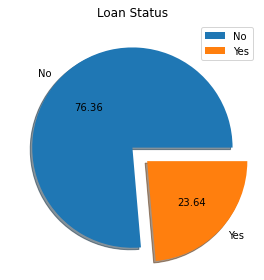

In [238]:

plt.pie(df['loan_status'].value_counts(),autopct='%.2f',shadow=True,explode=[0,0.2],labels =['No','Yes'])
plt.title('Loan Status')
plt.legend()
plt.tight_layout()

In [239]:
#The loan status values are imbalanced ,the no of NO values are high comapred to YES


In [240]:
#Missing values

In [241]:
df.isnull().sum()    

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
grade                               0
sub_grade                           0
emp_length                      13630
home_ownership                      0
annual_inc                          2
verification_status                 0
pymnt_plan                          0
purpose                             0
addr_state                          0
dti                                 0
delinq_2yrs                         6
inq_last_6mths                      6
mths_since_last_delinq         138502
mths_since_last_record         228711
open_acc                            6
pub_rec                             6
revol_bal                           0
revol_util                        148
total_acc                           6
initial_list_status                 0
total_rec_in

In [242]:
# % of missing values in each feature

In [243]:
df.isnull().mean()[df.isnull().mean()>0 ]*100

emp_length                      5.048148
annual_inc                      0.000741
delinq_2yrs                     0.002222
inq_last_6mths                  0.002222
mths_since_last_delinq         51.297037
mths_since_last_record         84.707778
open_acc                        0.002222
pub_rec                         0.002222
revol_util                      0.054815
total_acc                       0.002222
collections_12_mths_ex_med      0.015556
mths_since_last_major_derog    74.998148
verification_status_joint      99.947778
acc_now_delinq                  0.002222
tot_coll_amt                    7.919630
tot_cur_bal                     7.919630
total_rev_hi_lim                7.919630
dtype: float64

In [244]:
print(df.skew())
#skew =0 --> normal
#>0 --right skwed
#<0 -->left skwed

member_id                       0.017745
loan_amnt                       0.679422
funded_amnt                     0.681582
funded_amnt_inv                 0.678673
int_rate                        0.431118
annual_inc                     45.243740
dti                             0.260178
delinq_2yrs                     5.480161
inq_last_6mths                  1.995966
mths_since_last_delinq          0.454888
mths_since_last_record         -0.201650
open_acc                        1.256533
pub_rec                         8.596030
revol_bal                      14.745967
revol_util                     -0.017023
total_acc                       0.893637
total_rec_int                   2.852667
total_rec_late_fee             18.739246
recoveries                     16.020333
collection_recovery_fee        27.585743
collections_12_mths_ex_med     16.790833
mths_since_last_major_derog     0.267736
acc_now_delinq                 19.496595
tot_coll_amt                   78.722242
tot_cur_bal     

### Generally we do not care much about slightly skewed features,,,,,, Just treat the highly skewed ones 
### As when we modify the entries it has a cost of loosing information so it is very important to understand where to cap and where to leave 

In [245]:
df[['verification_status_joint','mths_since_last_major_derog','mths_since_last_record','mths_since_last_delinq']].head()

,verification_status_joint,mths_since_last_major_derog,mths_since_last_record,mths_since_last_delinq
0,NaN,74.0,75.0,50.0
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,46.0
4,NaN,NaN,NaN,NaN


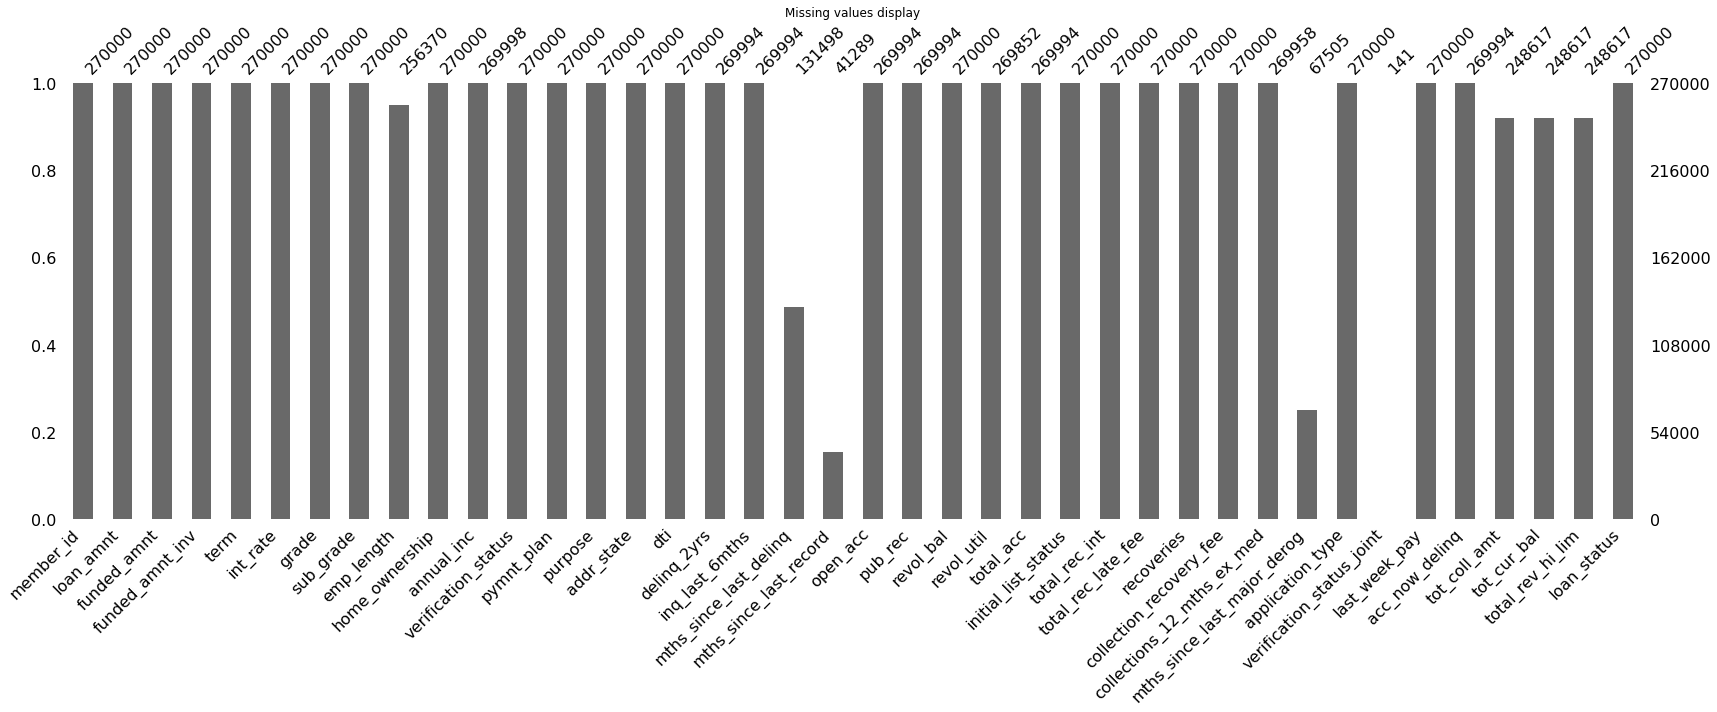

In [246]:
msno.bar(df)
plt.title('Missing values display')
plt.tight_layout()

In [247]:
#lets drop Features verification_status_joint,mths_since_last_major_derog,mths_since_last_record,desc,mths_since_last_delinq
#Even though we try to impute these missing values these would lead to create some bias or lead to wrong insights
df.drop(['verification_status_joint','mths_since_last_major_derog','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)

In [248]:
#Univariate Analysis

In [249]:
#Creating 2 new data frames for analysis purpose specific to Cat and continous featureS
df_cat = df.select_dtypes(include='object')
df_num = df.select_dtypes(exclude='object')
print(df_num.shape,df_cat.shape)

(270000, 23) (270000, 13)


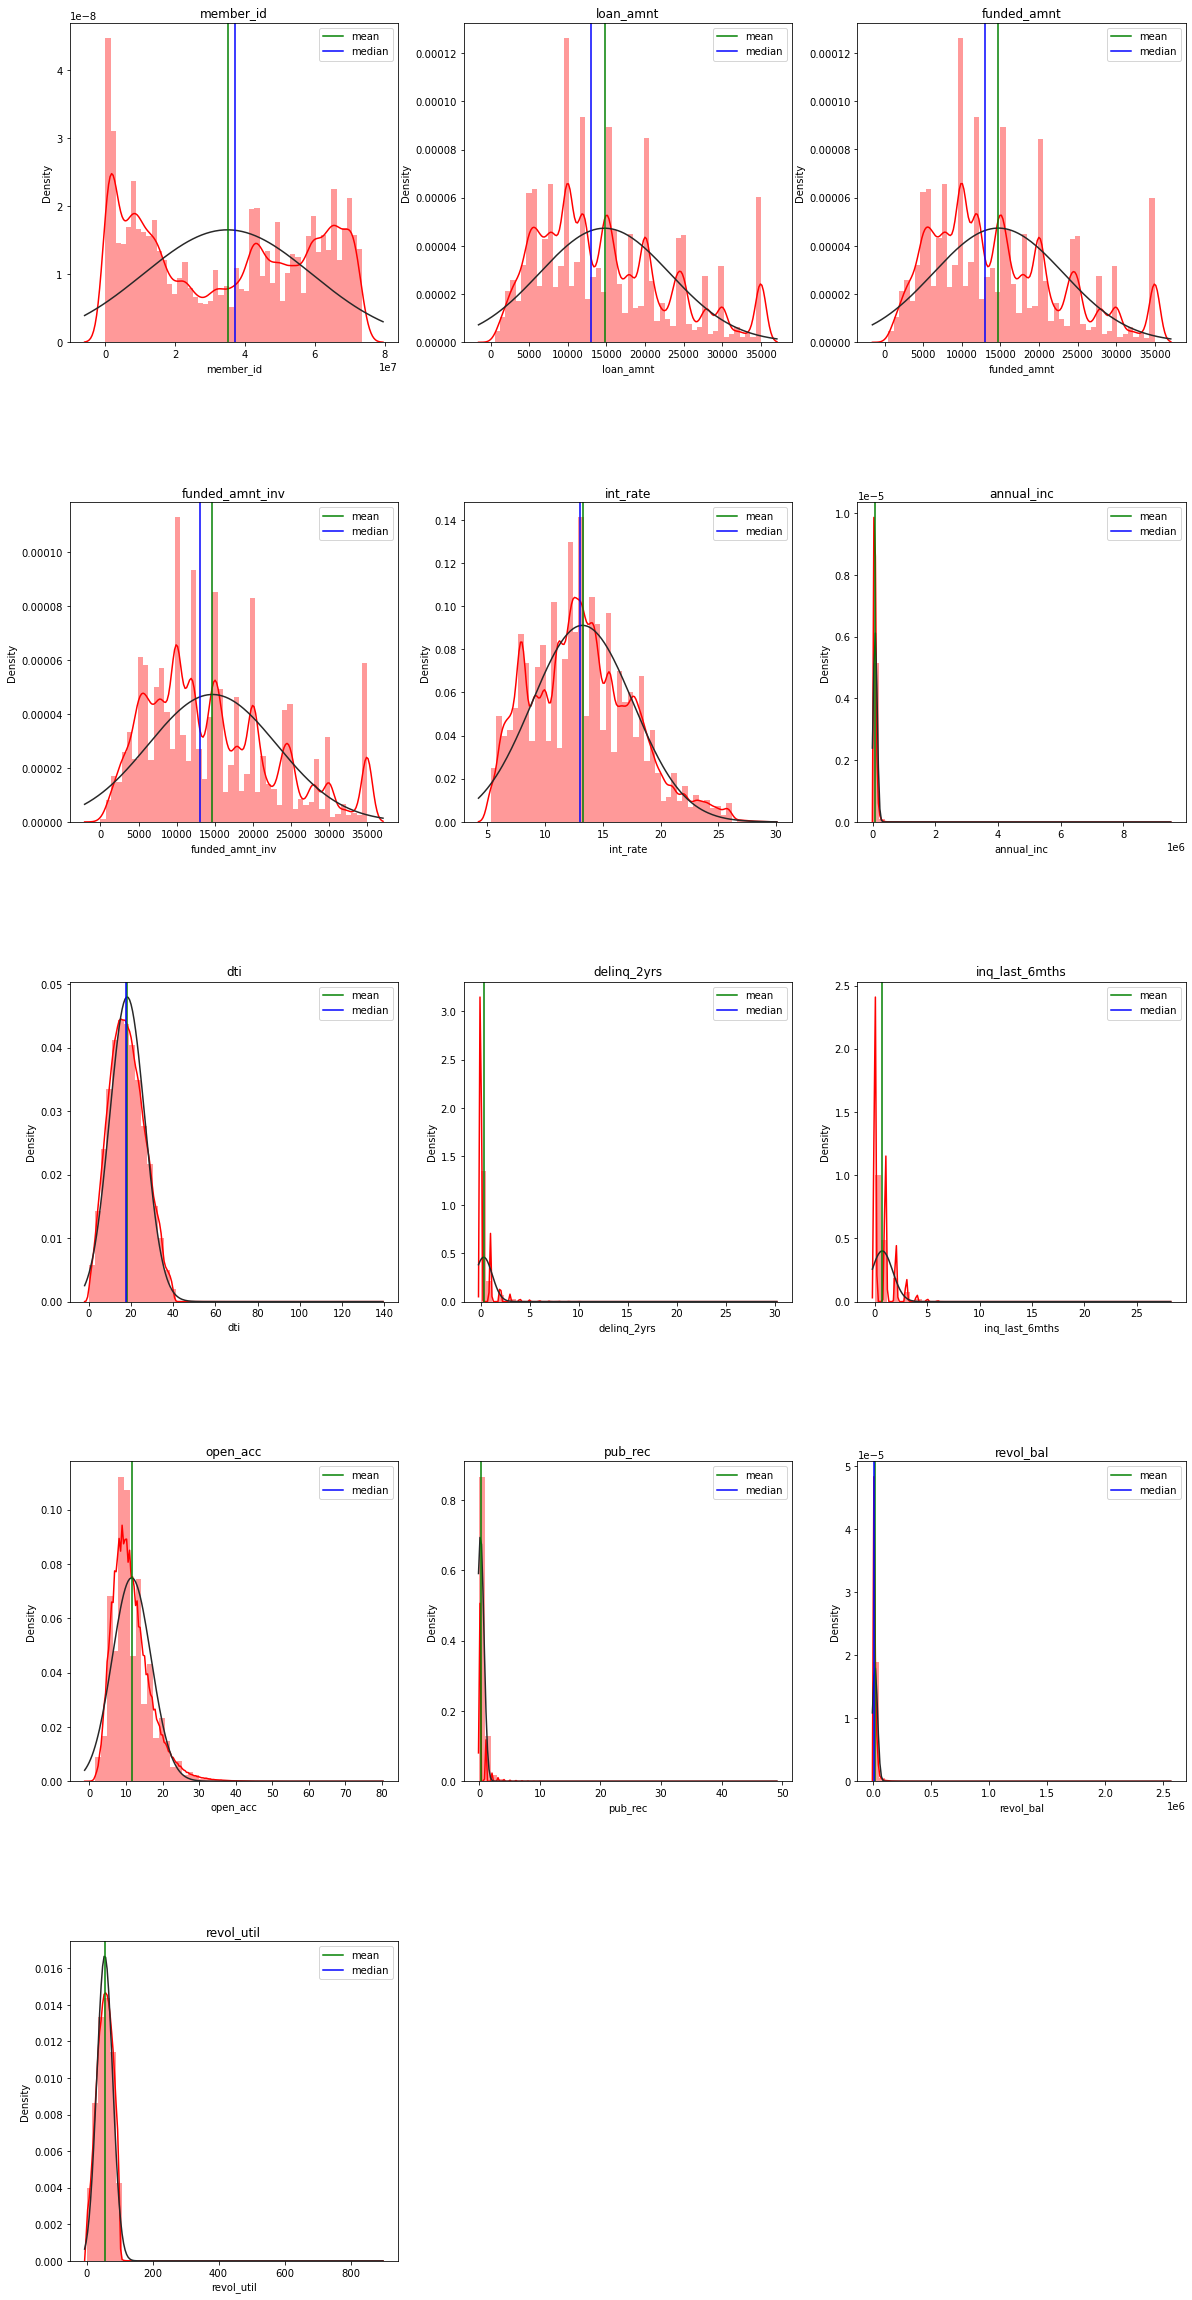

In [250]:
plt.subplots(figsize=(20,50))
col = df_num[df_num.notnull()].iloc[:,:13].columns
lenght = len(col)
for i, j in zip(col, range(lenght)):
    plt.subplot((lenght/2), 3, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.5)
    sns.distplot(df_num[i], kde=True, fit=stats.norm,color='r')
    plt.title(i) 
    plt.axvline(df_num[i].mean(),color='g',label='mean')
    plt.axvline(np.median(df[i]),color='b',label='median')   
    plt.legend() 
#for ease of visiblity and understanding ploting first 13 continous features





In [251]:
#loan amt , funded amount  and  funded amount by investors are  right skwed distribution and are distributed along same ranges.
#Highest concentration of points for interst rate is between 10 and 20% 
#Highest concentration of points for dti(repaymmet to income ration ) is between 15-25%
#majority of the customers are not behind on payments in number of 30+ days in past 2 years.
#but few occurances 1-2 times can be seen where customers were behind payments for 30+ days in past 2 years.
#1-2  inquiries in last 6 months for the customer who failed to repay, this can affect credit score
# 5-10 credit lines of open credit line in eliglible customer's credit line.Open-end credit is a preapproved loan between a 
#bank and borrower that may be used repeatedly up to a certain limit.
#very few or minimal customer with  derogatory public records.
#revol_util show normal distribution 



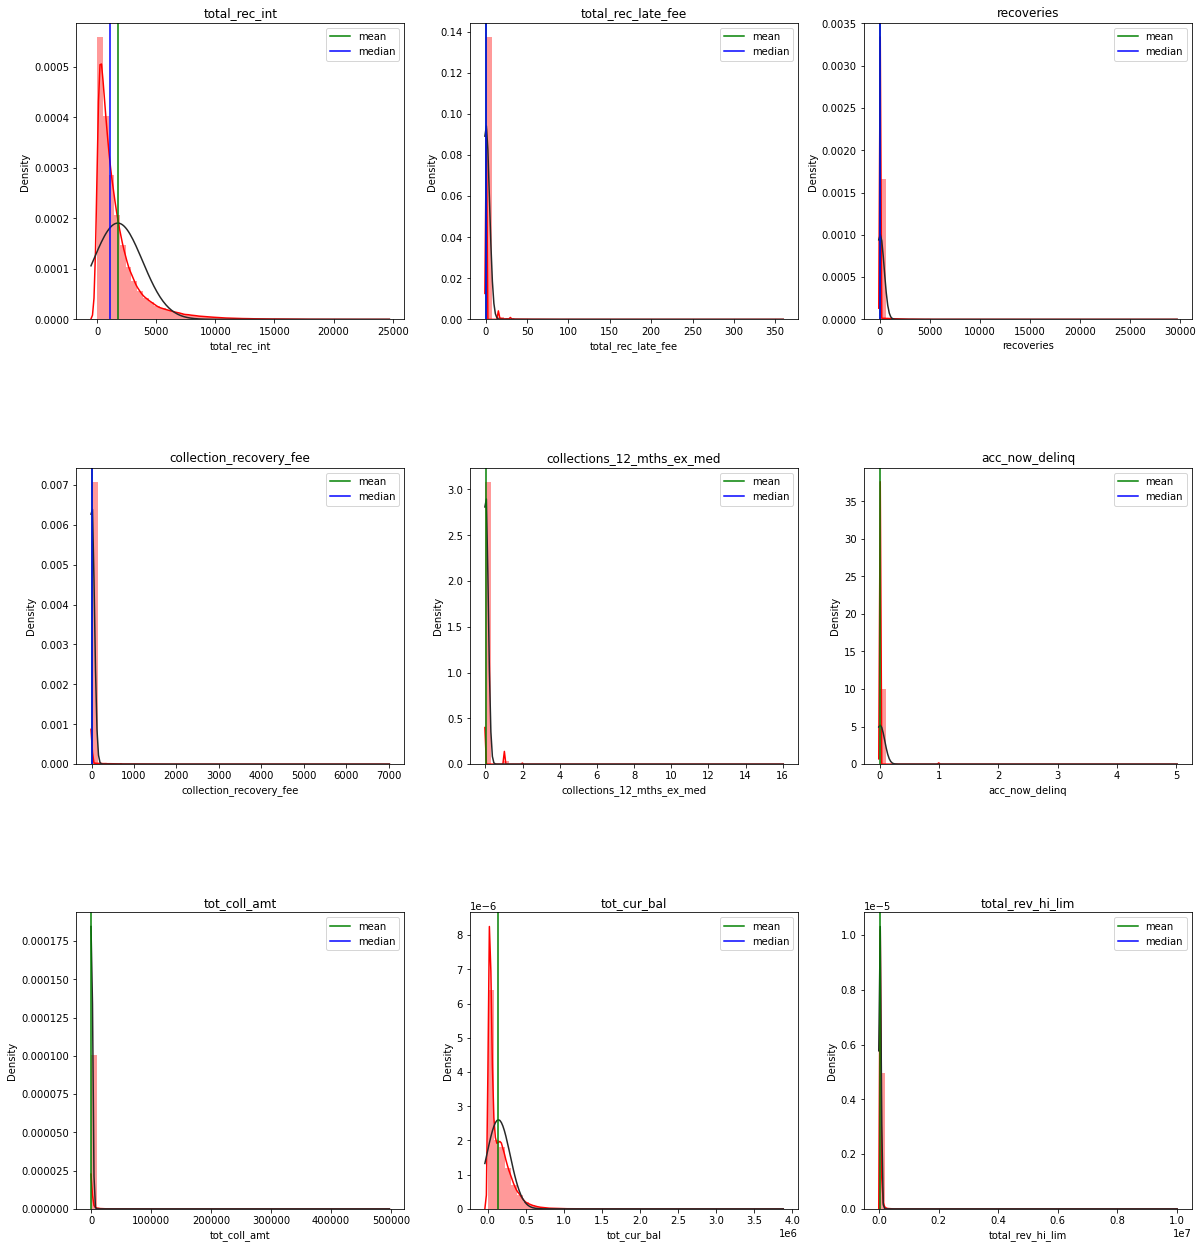

In [252]:
plt.subplots(figsize=(20,30))
col = df_num[df_num.notnull()].iloc[:,14:].columns
lenght = len(col)
for i, j in zip(col, range(lenght)):
    plt.subplot((lenght/2), 3, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.5)
    sns.distplot(df_num[i], kde=True, fit=stats.norm,color='r')
    plt.title(i)
    plt.axvline(df_num[i].mean(),color='g',label='mean')
    plt.axvline(np.median(df[i]),color='b',label='median')
    plt.legend() 
#for ease of visiblity and understanding ploting remining  continous features    

In [253]:
#Intrest rec till date is around 10000$
#very minimal late fees ,collection recovery fee and recoveries are done .
#less than 1  collections in last 12 months excluding medical collections
#zero accounts on which the member is delinquent
#total current balance of all accounts shows most of them are maintained below the averge balance 

In [254]:
print(df['emp_length'].unique())
df['emp_length'].replace({'9 years':9, '2 years':2 ,'5 years':5 ,'8 years':8, '7 years':7, '4 years':4, '1 year':1,
                          '3 years':3, '6 years':6,'10+ years':10,'< 1 year':0},inplace=True)
print(df['emp_length'].unique())

['9 years' '< 1 year' '2 years' '10+ years' '5 years' '8 years' '7 years'
 '4 years' nan '1 year' '3 years' '6 years']
[ 9.  0.  2. 10.  5.  8.  7.  4. nan  1.  3.  6.]


### This is good but you coule have directly extracted the integer part, I think we only have years as interger, if I am not wrong

In [255]:
df['emp_length'] = df['emp_length'].astype('object')

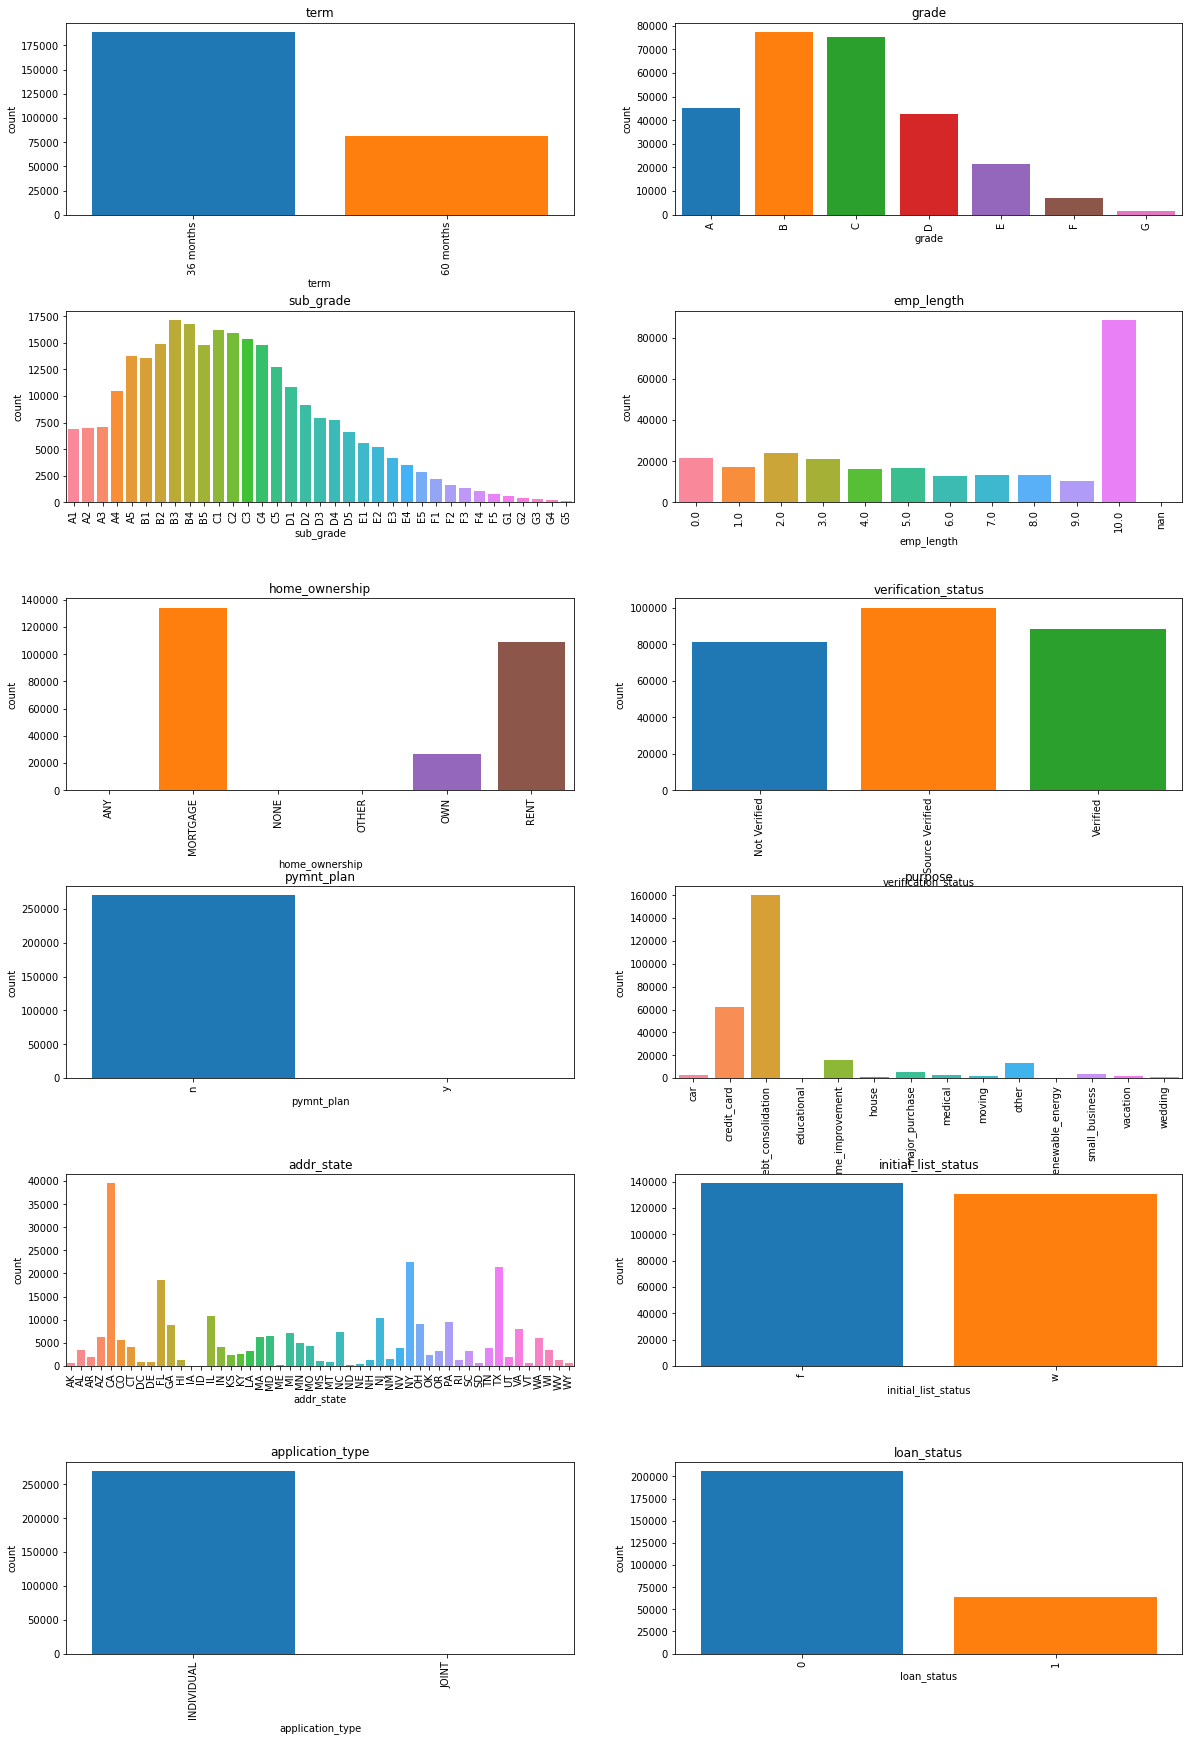

In [256]:

plt.subplots(figsize=(20,30))
col =['term', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan',
       'purpose','addr_state', 'initial_list_status',
       'application_type','loan_status']
lenght = len(col)
for i, j in zip(col, range(lenght)):
    plt.subplot((lenght/2),2, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.5)
    sns.countplot(df[i],order=sorted(df[i].unique()),saturation=1)
    plt.title(i)
    plt.ticklabel_format()
    plt.xticks(rotation=90)
   


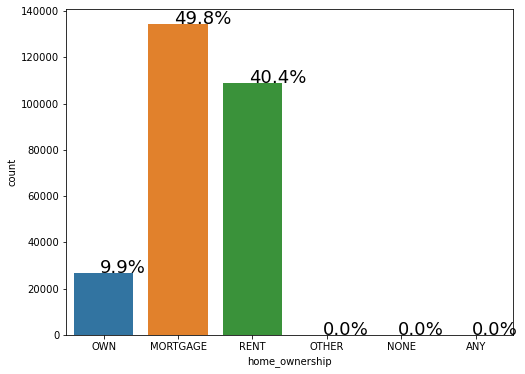

In [257]:
def plt_percente(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 18)
    plt.show()
plt.subplots(figsize=(8,6))
ax = sns.countplot(data=df, x='home_ownership');

plt_percente(ax, df.home_ownership)
#Lets include other none any into rent 
df['home_ownership'].replace({'OTHER':'RENT','NONE':'RENT','ANY':'RENT'},inplace=True)

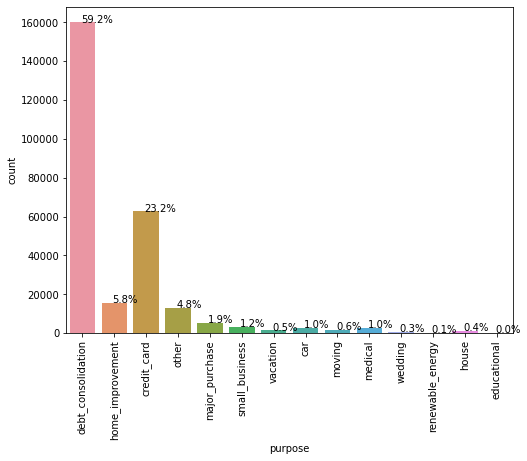

debt_consolidation    159947
credit_card            62594
home_improvement       15650
other                  12964
major_purchase          5209
small_business          3123
car                     2653
medical                 2641
moving                  1685
vacation                1414
house                   1081
wedding                  745
renewable_energy         170
educational              124
Name: purpose, dtype: int64

In [258]:
def plt_percente(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 10)
    plt.show()
plt.subplots(figsize=(8,6))
ax = sns.countplot(data=df, x='purpose');
plt.xticks(rotation=90)
plt_percente(ax, df.purpose)
#Lets regroup
df['purpose'].value_counts()

In [259]:
df['purpose'].replace({'home_improvement':'home_loan' ,'house':'home_loan','vacation':'personal_loan','wedding':'personal_loan',
                         'medical':'personal_loan', 'car':'asset_loan','major_purchase':'asset_loan','renewable_energy':'business','small_business':'business',
                                'moving':'education_loan','educational':'education_loan'},inplace=True)

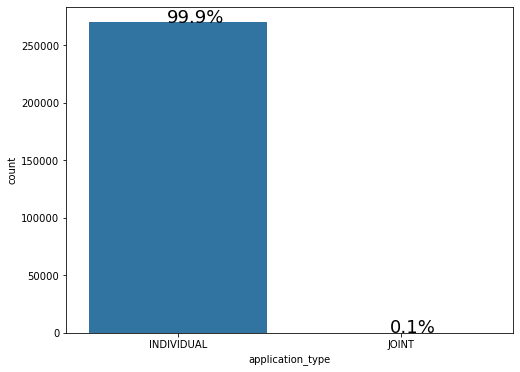

In [260]:
def plt_percente(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 18)
    plt.show()
plt.subplots(figsize=(8,6))
ax = sns.countplot(data=df, x='application_type');

plt_percente(ax, df.application_type)

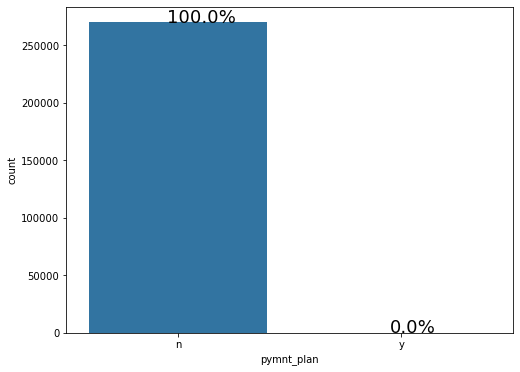

In [261]:
def plt_percente(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 18)
    plt.show()
plt.subplots(figsize=(8,6))
ax = sns.countplot(data=df, x='pymnt_plan');

plt_percente(ax, df.pymnt_plan)

In [262]:
#lets drop these 2 feature as they have almost single value for all entries
df.drop(['pymnt_plan','application_type'],axis=1,inplace=True)

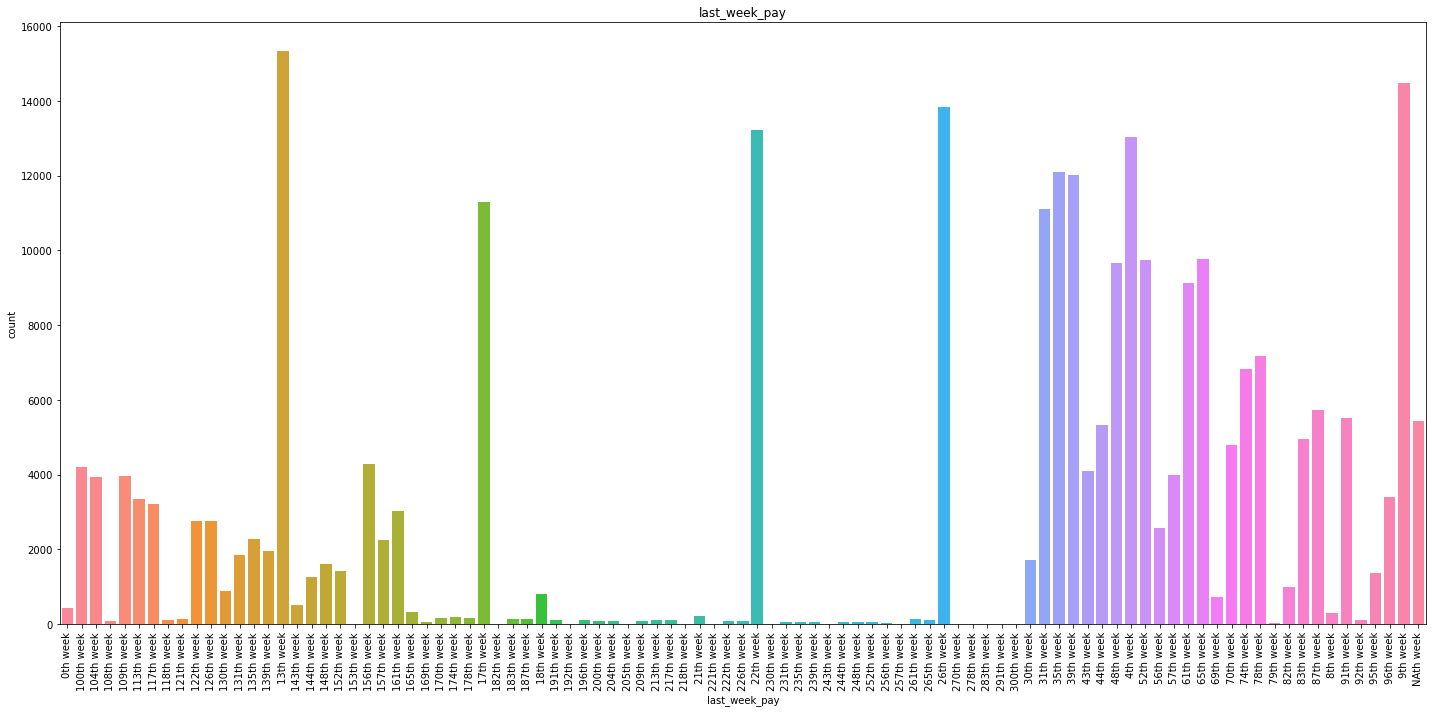

In [263]:
plt.figure(figsize=(20,10))
sns.countplot(df['last_week_pay'],order=sorted(df['last_week_pay'].unique()),saturation=1)
plt.title('last_week_pay')
plt.ticklabel_format()
plt.xticks(rotation=90)
plt.tight_layout()

In [264]:
#13th 22 26th 9th 17th 4th 31 35 and 39 week's are most weeks till which  members have paid EMI's
#Majoruty of  all application types applied for loan are individual
#loan term prefered seems to be 36 months also 60 months are considered by some customers 
#Most of the customer applyin for loans belongs to groups B,C and then A,D grade.
#B4 B3 and C1 C2 among B and C grades are where most cconcentration of sub graded alloted can be observed
#10+years expecienced people are seems to be most applying the loans 
#Only few members applying for loan own the home most of them are have rented or houses are in motargaed 
#Most of the loans given have not statred the payment plans yet....or members have notopted to payplans against the loans
#Verification status is mostly under debt consolidataion 
#CA is most members living state applying for loan
#24% have loan defaulters
#stat code we can see area wise loan's given

In [265]:
#Bivariate analysis

In [266]:
#lets analyze continous features with the target feature

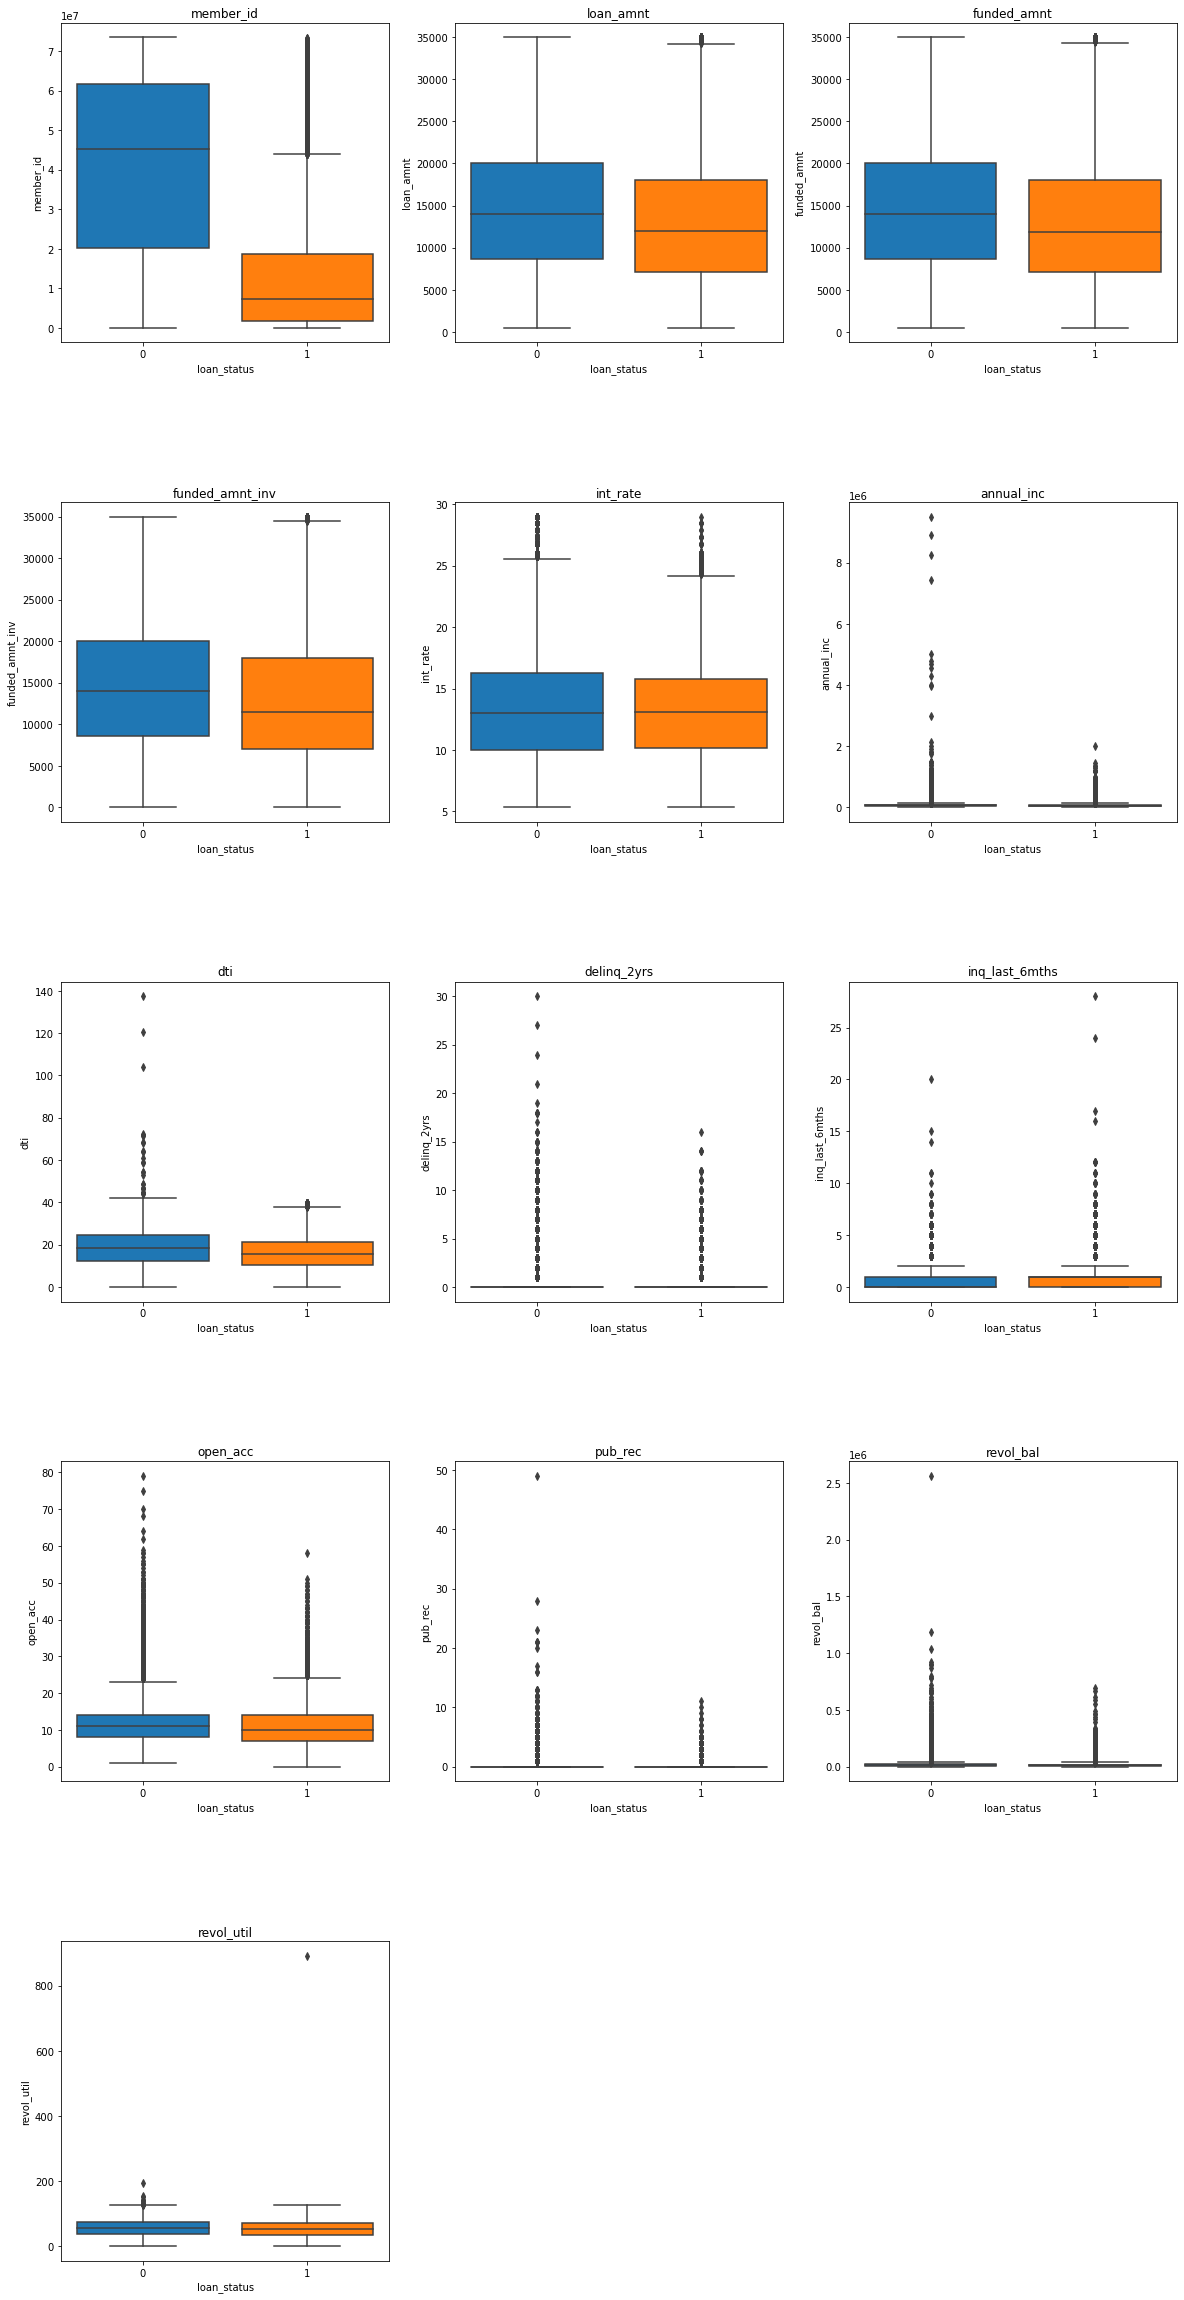

In [267]:
plt.subplots(figsize=(20,50))
col = df_num.iloc[:,:13].columns
lenght = len(col)
for i, j in zip(col, range(lenght)):
    plt.subplot((lenght/2), 3, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.5)
    sns.boxplot(y=df[i],x=df['loan_status'],saturation=1)
    plt.title(i)   
#for ease of visiblity and understanding ploting first 13 continous features

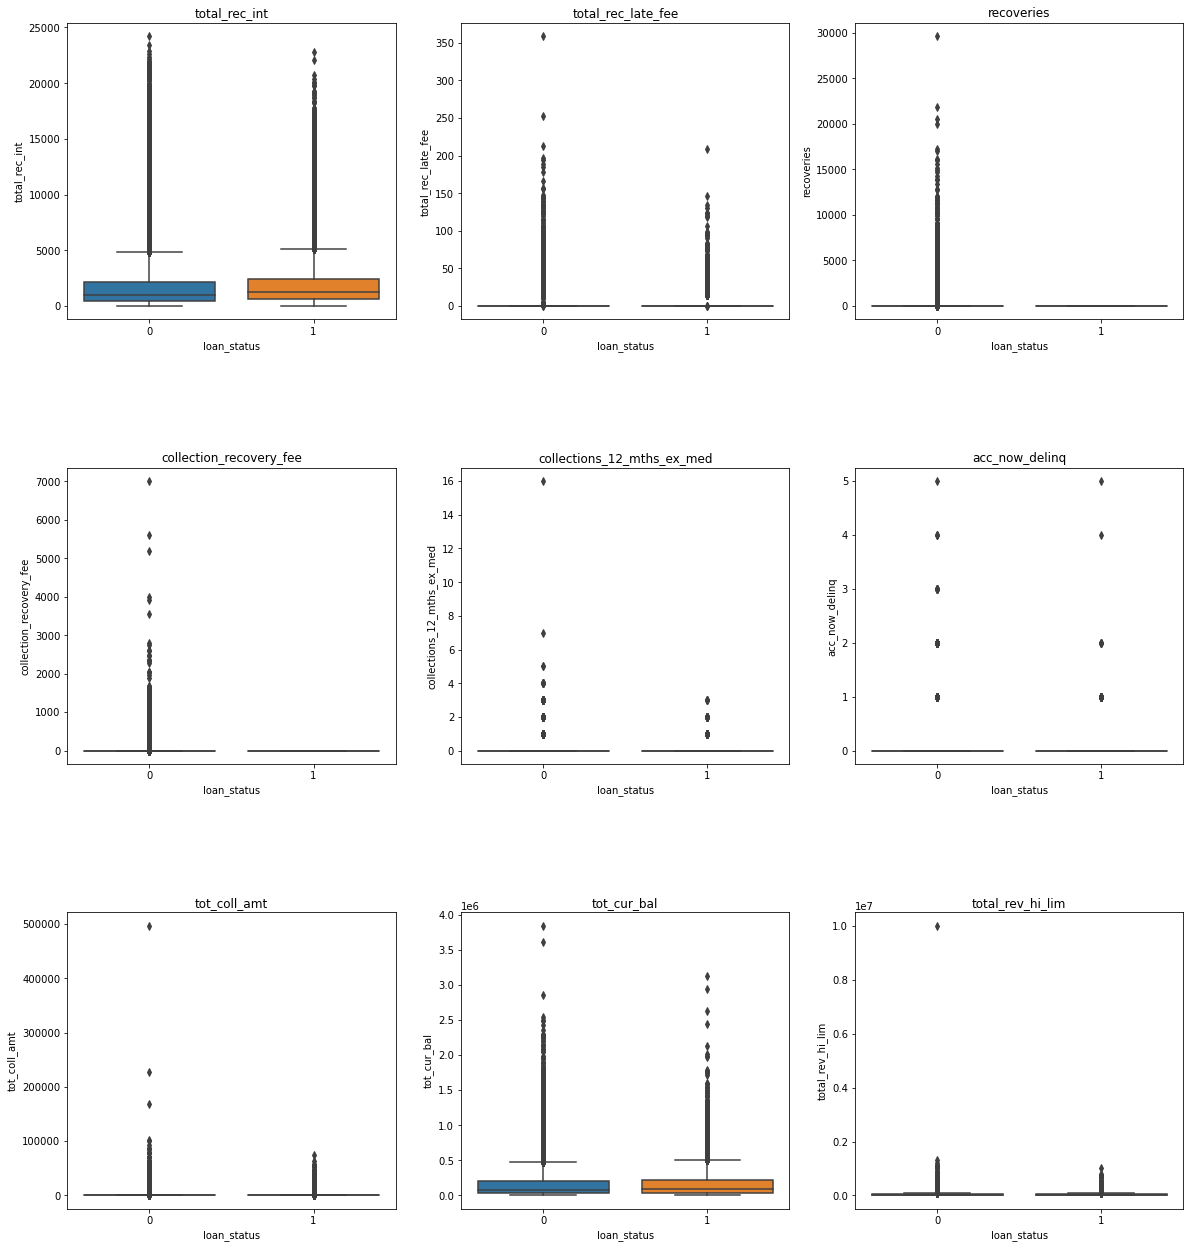

In [268]:
plt.subplots(figsize=(20,30))
col = df_num.iloc[:,14:].columns
lenght = len(col)
for i, j in zip(col, range(lenght)):
    plt.subplot((lenght/2), 3, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.5)
    sns.boxplot(y=df[i],x=df['loan_status'])
    plt.title(i)
    

In [269]:
#We can see member id shows good variablity between the defaulters and non defaulter
#but this can only be verified mem id alloted are not random
#All other columns are having overlap between debafulter and non defaulter
#we can see many outliers in different features

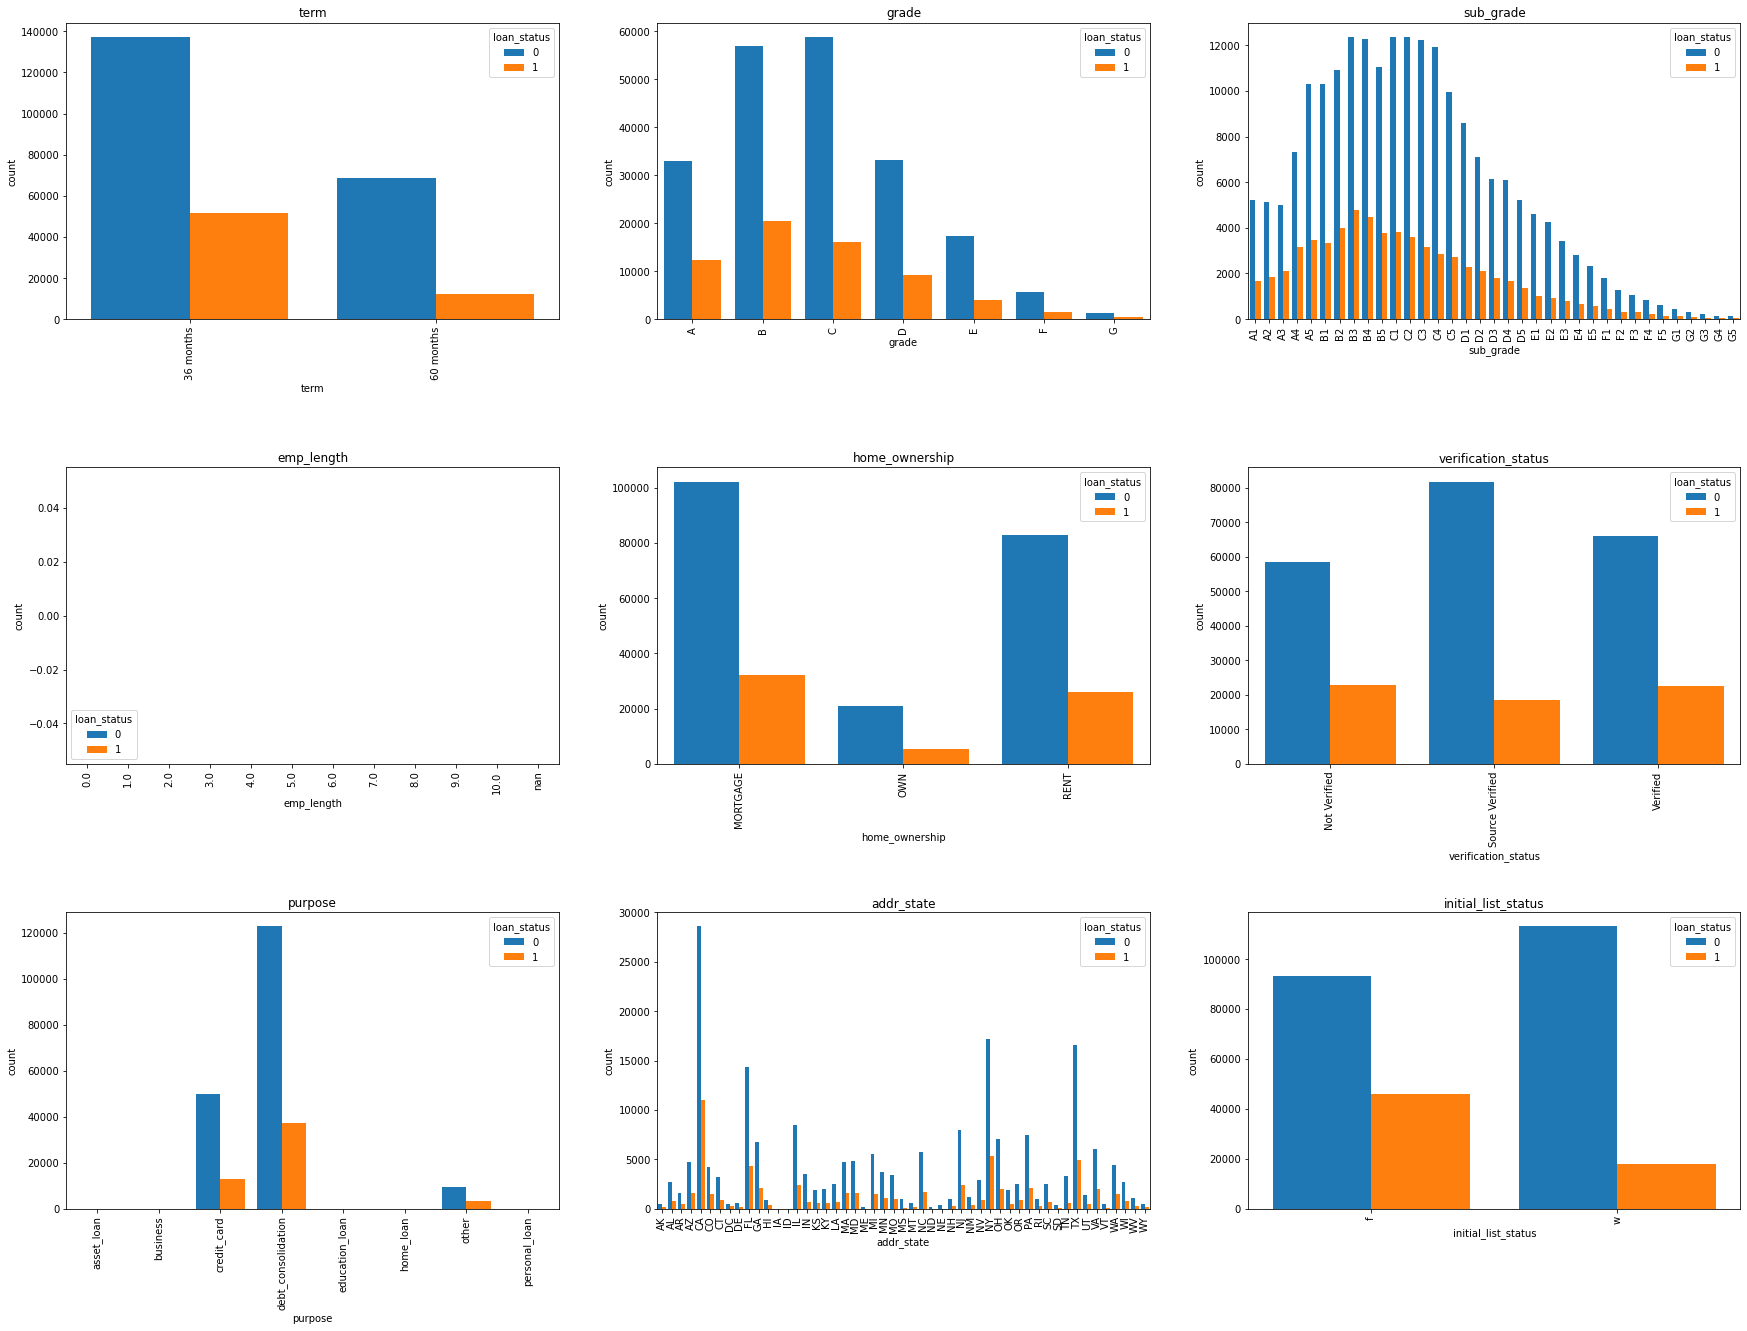

In [270]:
plt.subplots(figsize=(30,30))
col =['term', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'verification_status',
       'purpose','addr_state', 'initial_list_status']
lenght = len(col)
for i, j in zip(col, range(lenght)):
    plt.subplot((lenght/2),3, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.5)
    sns.countplot(df_cat[i],hue=df['loan_status'],order=sorted(df[i].unique()),saturation=1)
    plt.title(i)
    plt.ticklabel_format()
    plt.xticks(rotation=90)
#In each cat we can see that the defaulter and non defaulter can be segregatted

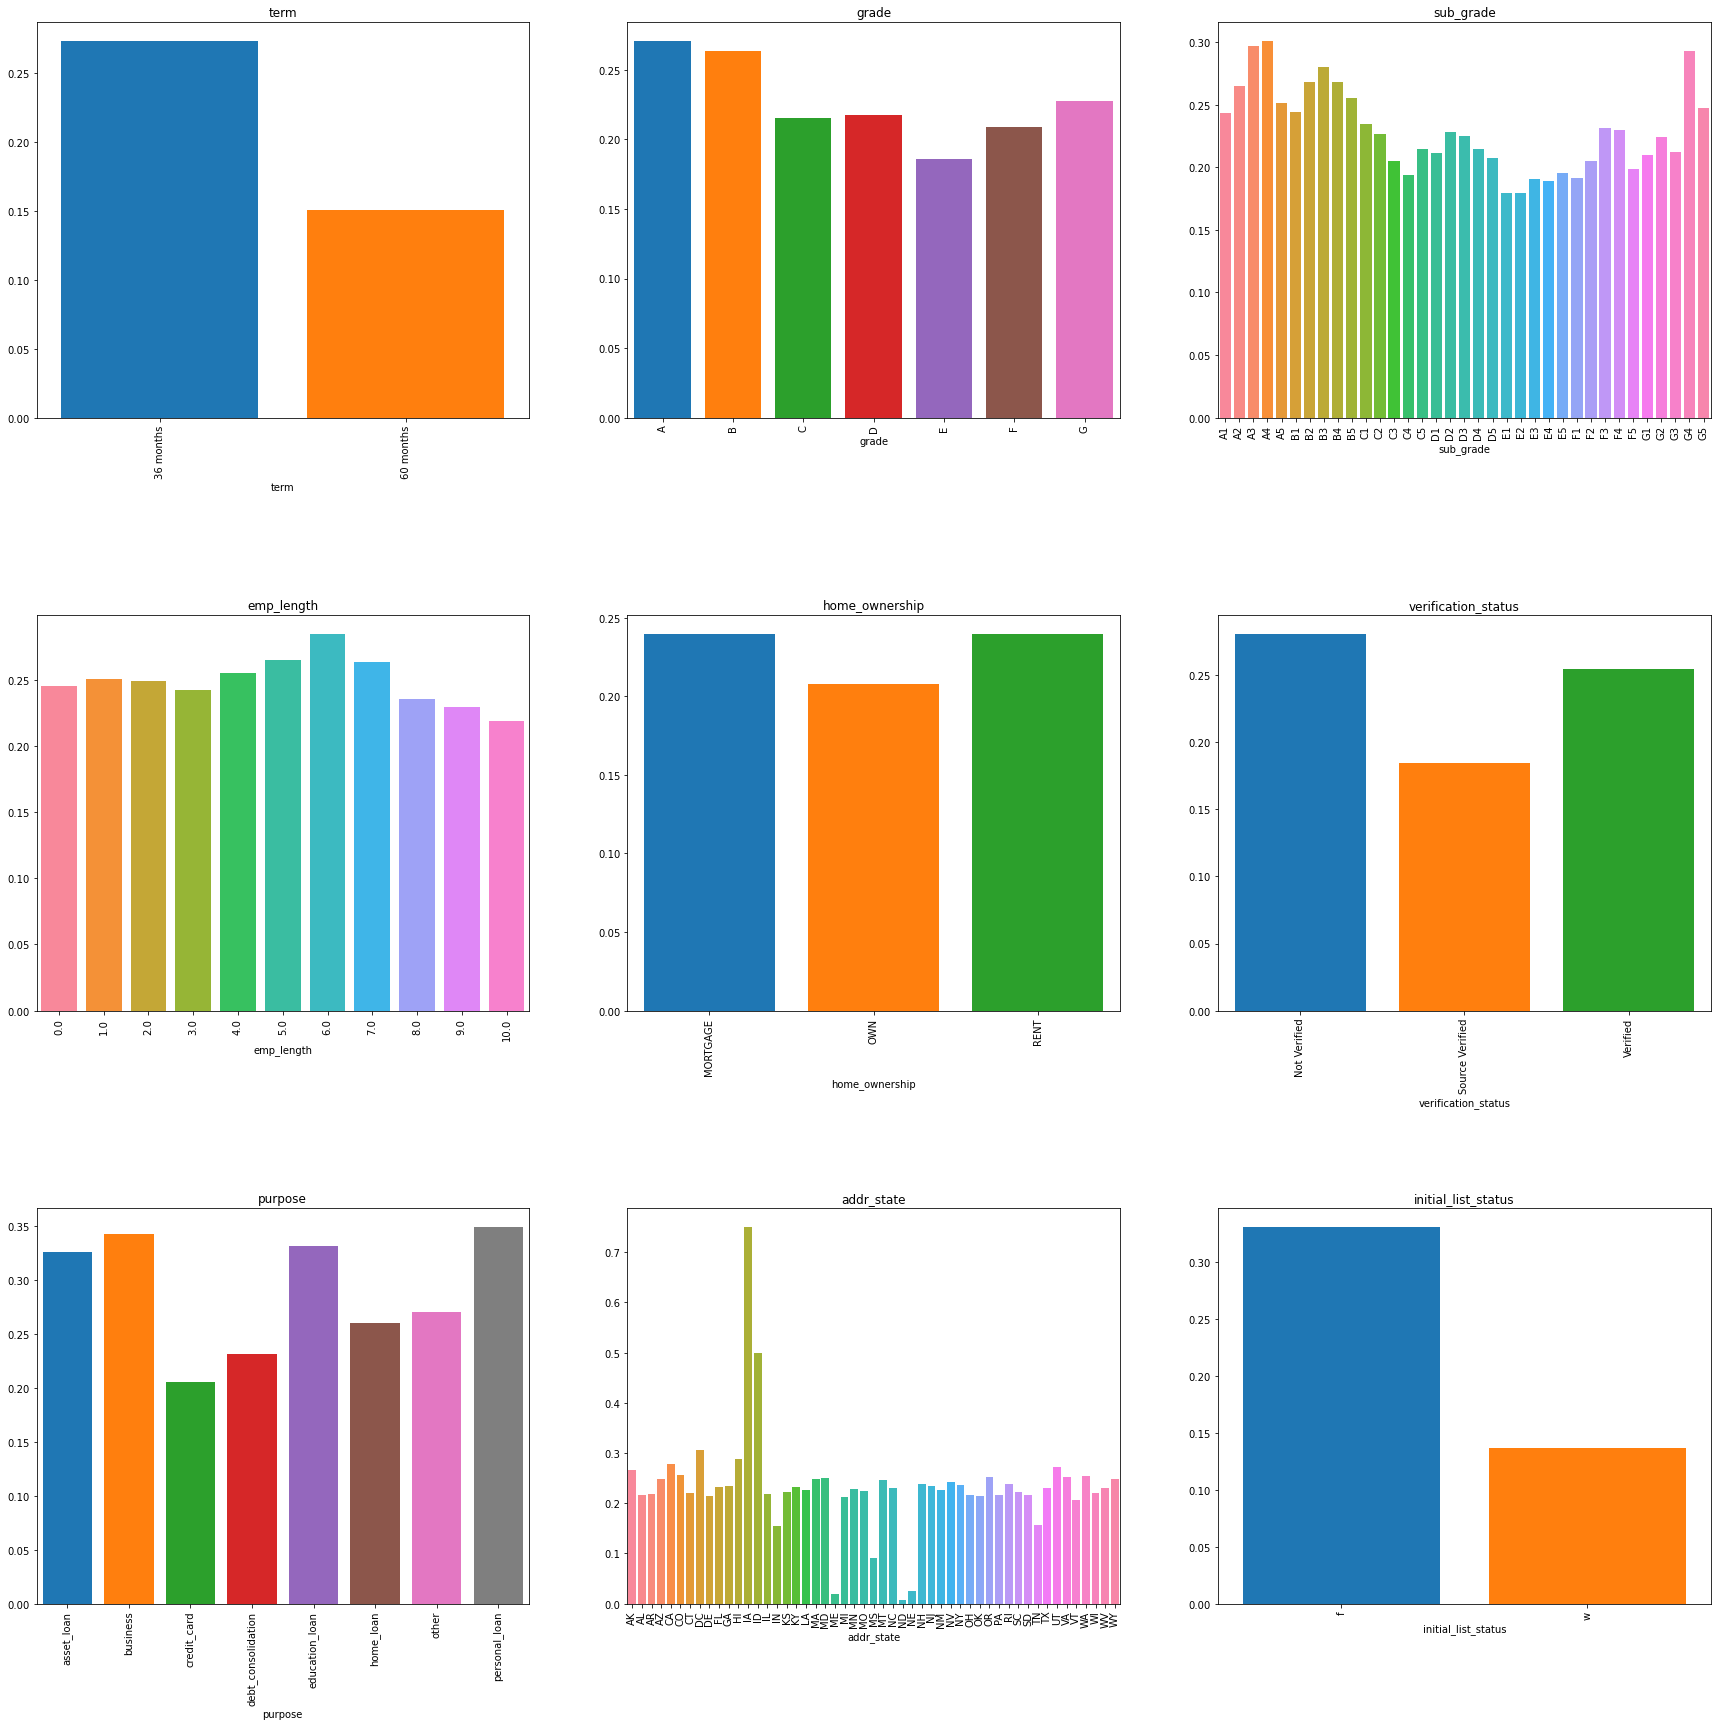

In [271]:
plt.subplots(figsize=(30,40))
col =['term', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'verification_status',
       'purpose','addr_state', 'initial_list_status']
lenght = len(col)
for i, j in zip(col, range(lenght)):
    data = df.groupby(i)['loan_status'].value_counts(normalize=True).loc[:, 1]
    plt.subplot((lenght/2),3, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.5)
    sns.barplot(x=data.index, y=data.values, saturation=1)
    plt.title(i)
    plt.ticklabel_format()
    plt.xticks(rotation=90)


In [272]:
#opting for longer term period are less defaluters
#subgrade is not giving us much insights ,but the info and repsentation is similar to grade,so we can drop sub grade 
#motgae are less changes to default ,
#non verified are more to default also verifed are compared to source verified 
#loan taken for credit card  are more to default 
#more chances of default in area code LA and LA
#credit card and debt repay loans are more likely to default
df.drop(['sub_grade'],axis=1,inplace=True)

In [273]:
#more chances of default in area code LA and LA but apart from this 2 there is no major insights also 51 types of values avaloble 
df.drop(['addr_state'],axis=1,inplace=True)

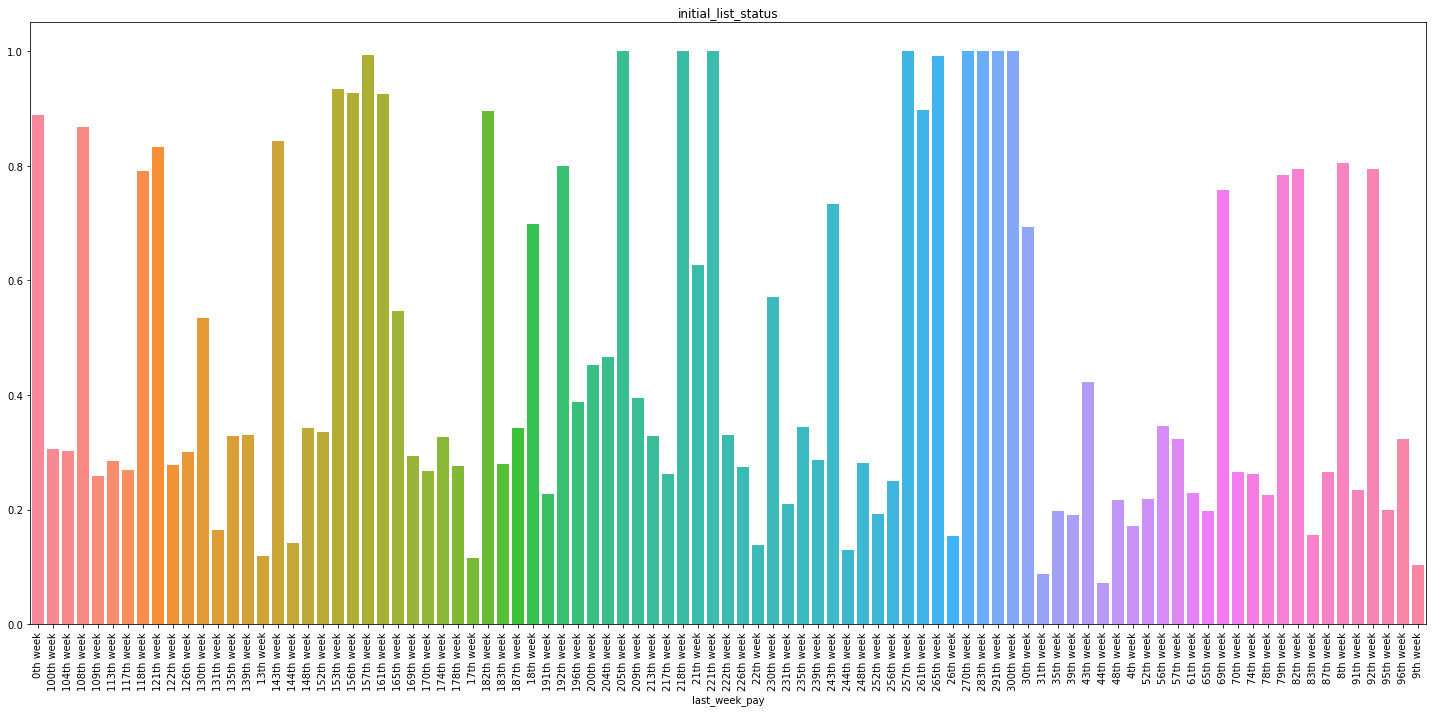

In [274]:
plt.figure(figsize=(20,10))
data = df.groupby('last_week_pay')['loan_status'].value_counts(normalize=True).loc[:, 1]
sns.barplot(x=data.index, y=data.values, saturation=1)
plt.title(i)
plt.ticklabel_format()
plt.xticks(rotation=90)
plt.tight_layout()

In [275]:
#unable to get any patter here
#drop last_week_pay 
df.drop('last_week_pay',axis=1,inplace=True)

In [276]:
#correlation 
corr = df.corr()

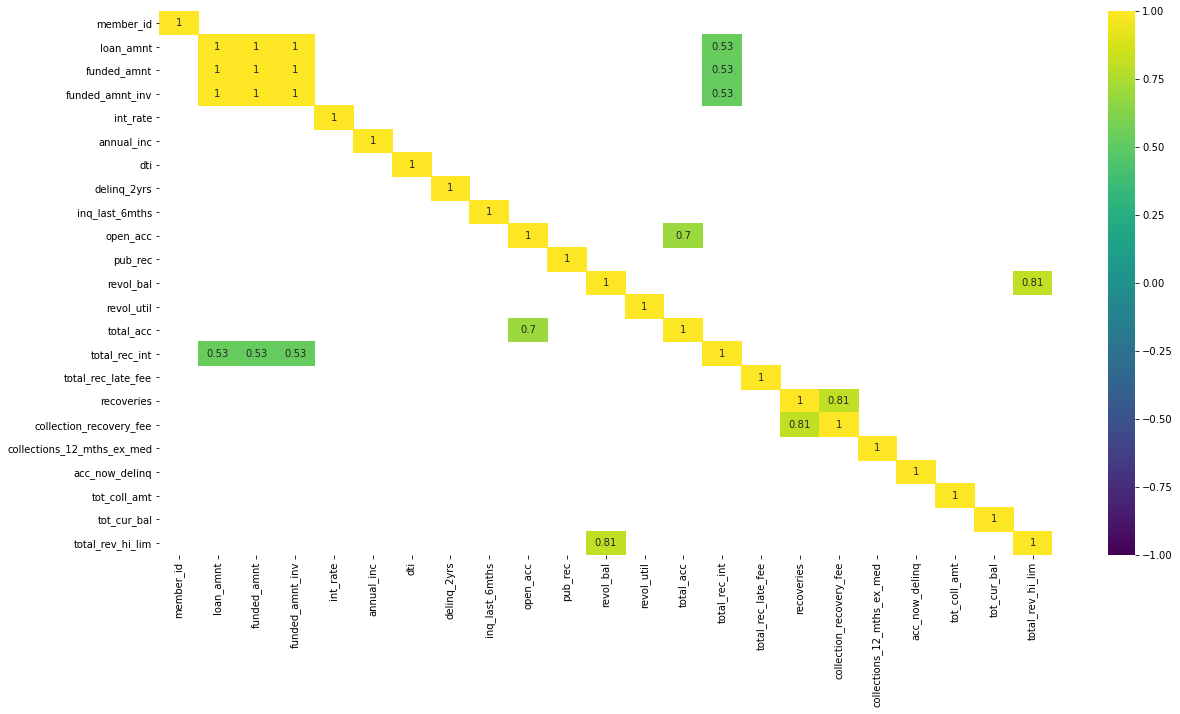

In [277]:
plt.figure(figsize=(20,10))
sns.heatmap(corr[(corr>0.50)|(corr<-0.50)],vmax=1,vmin=-1,cmap='viridis',annot=True)
plt.ticklabel_format()

In [278]:
#Perfect, we now have a list of strongly correlated values but 
#this list is incomplete as we know that correlation is affected by outliers. 
# we can see loan amt,funded amt,funded amt by inv are having high correlation coeff value
#revol_util and open_Acc 
#revol_bal and total_rev_hi_lim 
#recoveries and coll recoevries fees 
#are also having good +ve corr coff



In [279]:
#correlation by itself does not always explain the relationship between data 
#so ploting them could even lead us to new insights and in the same manner, 
#check that our correlated values have a linear relationship
#lets plot them and see the distributions

<Figure size 1440x2160 with 0 Axes>

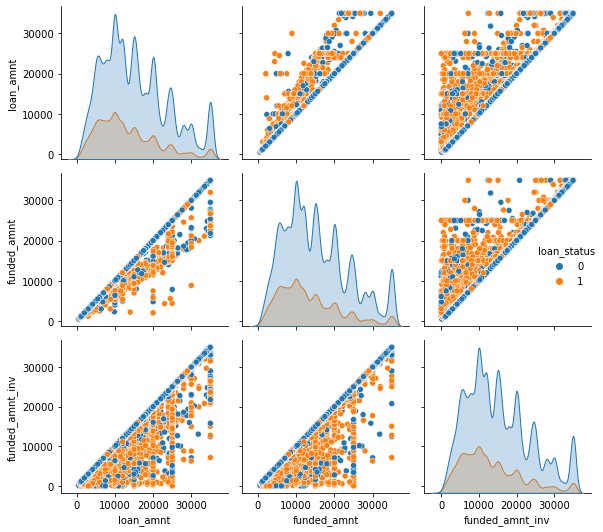

In [280]:
plt.figure(figsize=(20,30))
data = pd.concat([df['loan_amnt'],df['funded_amnt'],df['funded_amnt_inv'],df['loan_status']],axis=1)
sns.pairplot(data,hue='loan_status')
plt.ticklabel_format()
plt.tight_layout()

In [281]:
#we can see all these are  positively linerar correlated,but in many instances we have all three or combination of
#loan amt-funded amt or loan -amt-funded amt inv are almost same only 630+ are there where the loan amount is some combination 
#of 3 instances
data = pd.concat([df['loan_amnt'],df['funded_amnt'],df['funded_amnt_inv'],df['loan_status'],df['grade']],axis=1)
data['loan_funded'] = (df['loan_amnt']-df['funded_amnt'])
data['loan_inv'] = (df['loan_amnt']-df['funded_amnt_inv'])
print(data[(data['loan_funded'] != 0) & (data['loan_inv'] != 0)].sort_values('loan_status').shape)
#lets drop funded amount and funded amout inv
df.drop(['funded_amnt','funded_amnt_inv'],axis=1,inplace=True)

(632, 7)


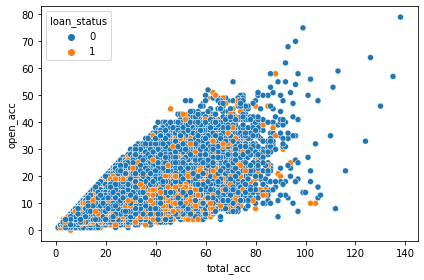

In [282]:

sns.scatterplot(df['total_acc'],df['open_acc'],hue=df['loan_status'])
plt.ticklabel_format()
plt.tight_layout()
#even corr coffe is high there is linear positive correlation btwn them.

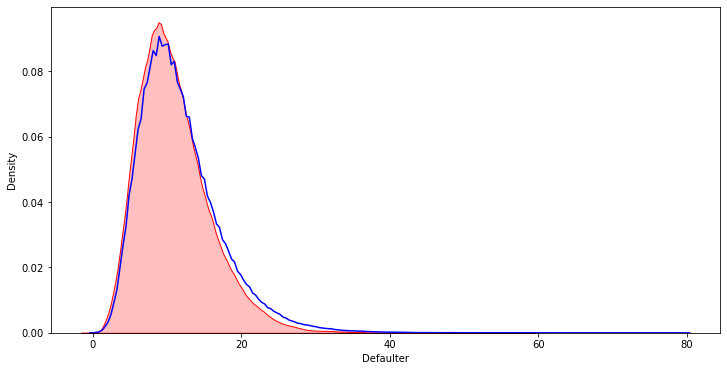

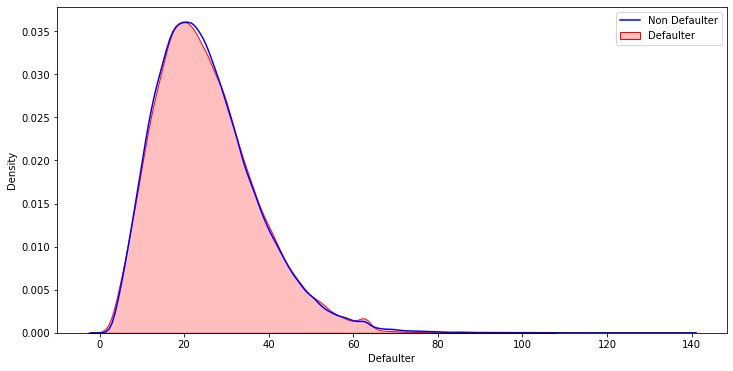

In [289]:
defaulters = df[df["loan_status"] == 1]
non_defaulters = df[df["loan_status"] == 0]
defaulters["Defaulter"] = defaulters["open_acc"]
non_defaulters["Non Defaulter"] = non_defaulters["open_acc"]
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.kdeplot(defaulters["Defaulter"],shade=True,color="r",)
ax = sns.kdeplot(non_defaulters["Non Defaulter"],  color="b")
defaulters = df[df["loan_status"] == 1]
non_defaulters = df[df["loan_status"] == 0]
defaulters["Defaulter"] = defaulters["total_acc"]
non_defaulters["Non Defaulter"] = non_defaulters["total_acc"]
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.kdeplot(defaulters["Defaulter"],shade=True,color="r",)
ax = sns.kdeplot(non_defaulters["Non Defaulter"],  color="b")

plt.legend(['Non Defaulter','Defaulter'])
#There is no much diff we can drop anyone 
#drop total_acc

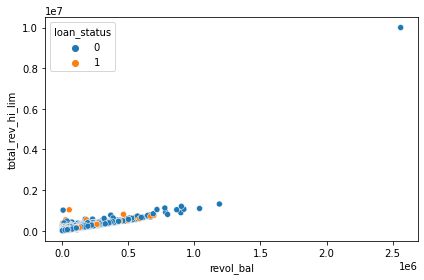

In [285]:

sns.scatterplot(df['revol_bal'],df['total_rev_hi_lim'],hue=df['loan_status'])
plt.ticklabel_format()
plt.tight_layout()
#this is again a linear positive correlation btwn feature

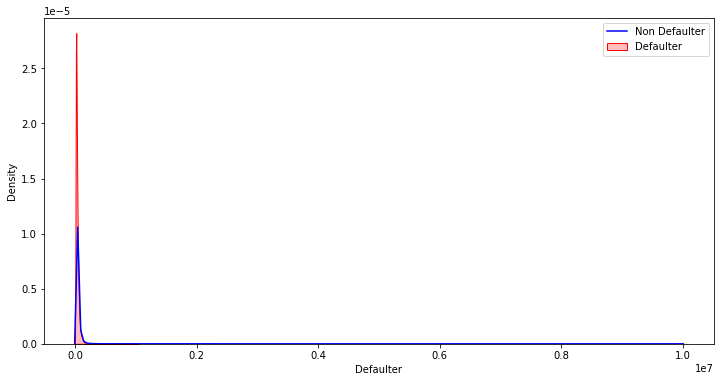

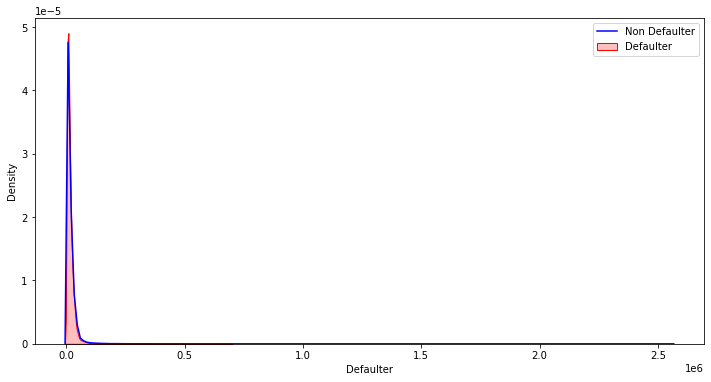

In [288]:
defaulters = df[df["loan_status"] == 1]
non_defaulters = df[df["loan_status"] == 0]
defaulters["Defaulter"] = defaulters["total_rev_hi_lim"]
non_defaulters["Non Defaulter"] = non_defaulters["total_rev_hi_lim"]
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.kdeplot(defaulters["Defaulter"],shade=True,color="r",)
ax = sns.kdeplot(non_defaulters["Non Defaulter"],  color="b")
plt.legend(['Non Defaulter','Defaulter'])
defaulters = df[df["loan_status"] == 1]
non_defaulters = df[df["loan_status"] == 0]
defaulters["Defaulter"] = defaulters["revol_bal"]
non_defaulters["Non Defaulter"] = non_defaulters["revol_bal"]
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.kdeplot(defaulters["Defaulter"],shade=True,color="r",)
ax = sns.kdeplot(non_defaulters["Non Defaulter"],  color="b")
plt.legend(['Non Defaulter','Defaulter'])
#we get a better seprablity with total_rev_hi_lim btwn defaul and non default /.....so we drop the revol_bal
#as the total_rev_hi_lim gets increrased chances of default increases

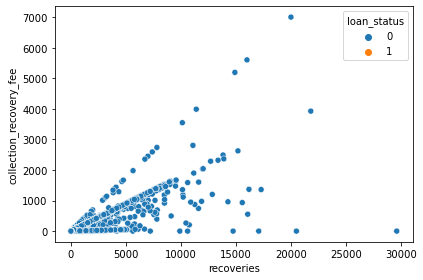

In [290]:
sns.scatterplot(df['recoveries'],df['collection_recovery_fee'],hue=df['loan_status'])
plt.ticklabel_format()
plt.tight_layout()
#Apart from some outlier these are also having linear postive corr

In [291]:
#we can drop anyone as there is no non default for this plot

In [292]:
df.drop(['collection_recovery_fee','revol_bal','total_acc'],axis=1,inplace=True)

In [293]:
#multivaraite analysis

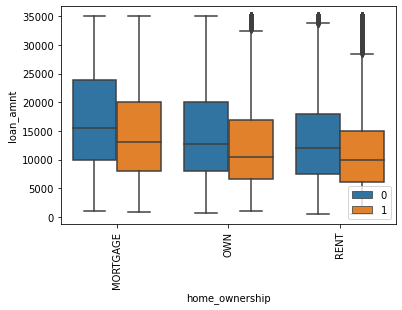

In [294]:
sns.boxplot(y=df['loan_amnt'],x=df['home_ownership'].sort_values(),hue=df['loan_status'])
plt.xticks(rotation=90)
plt.legend(loc=4)

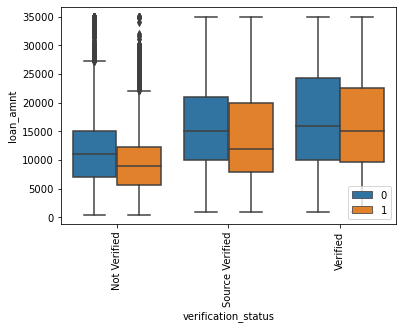

In [295]:
sns.boxplot(y=df['loan_amnt'],x=df['verification_status'].sort_values(),hue=df['loan_status'])
plt.xticks(rotation=90)
plt.legend(loc=4)

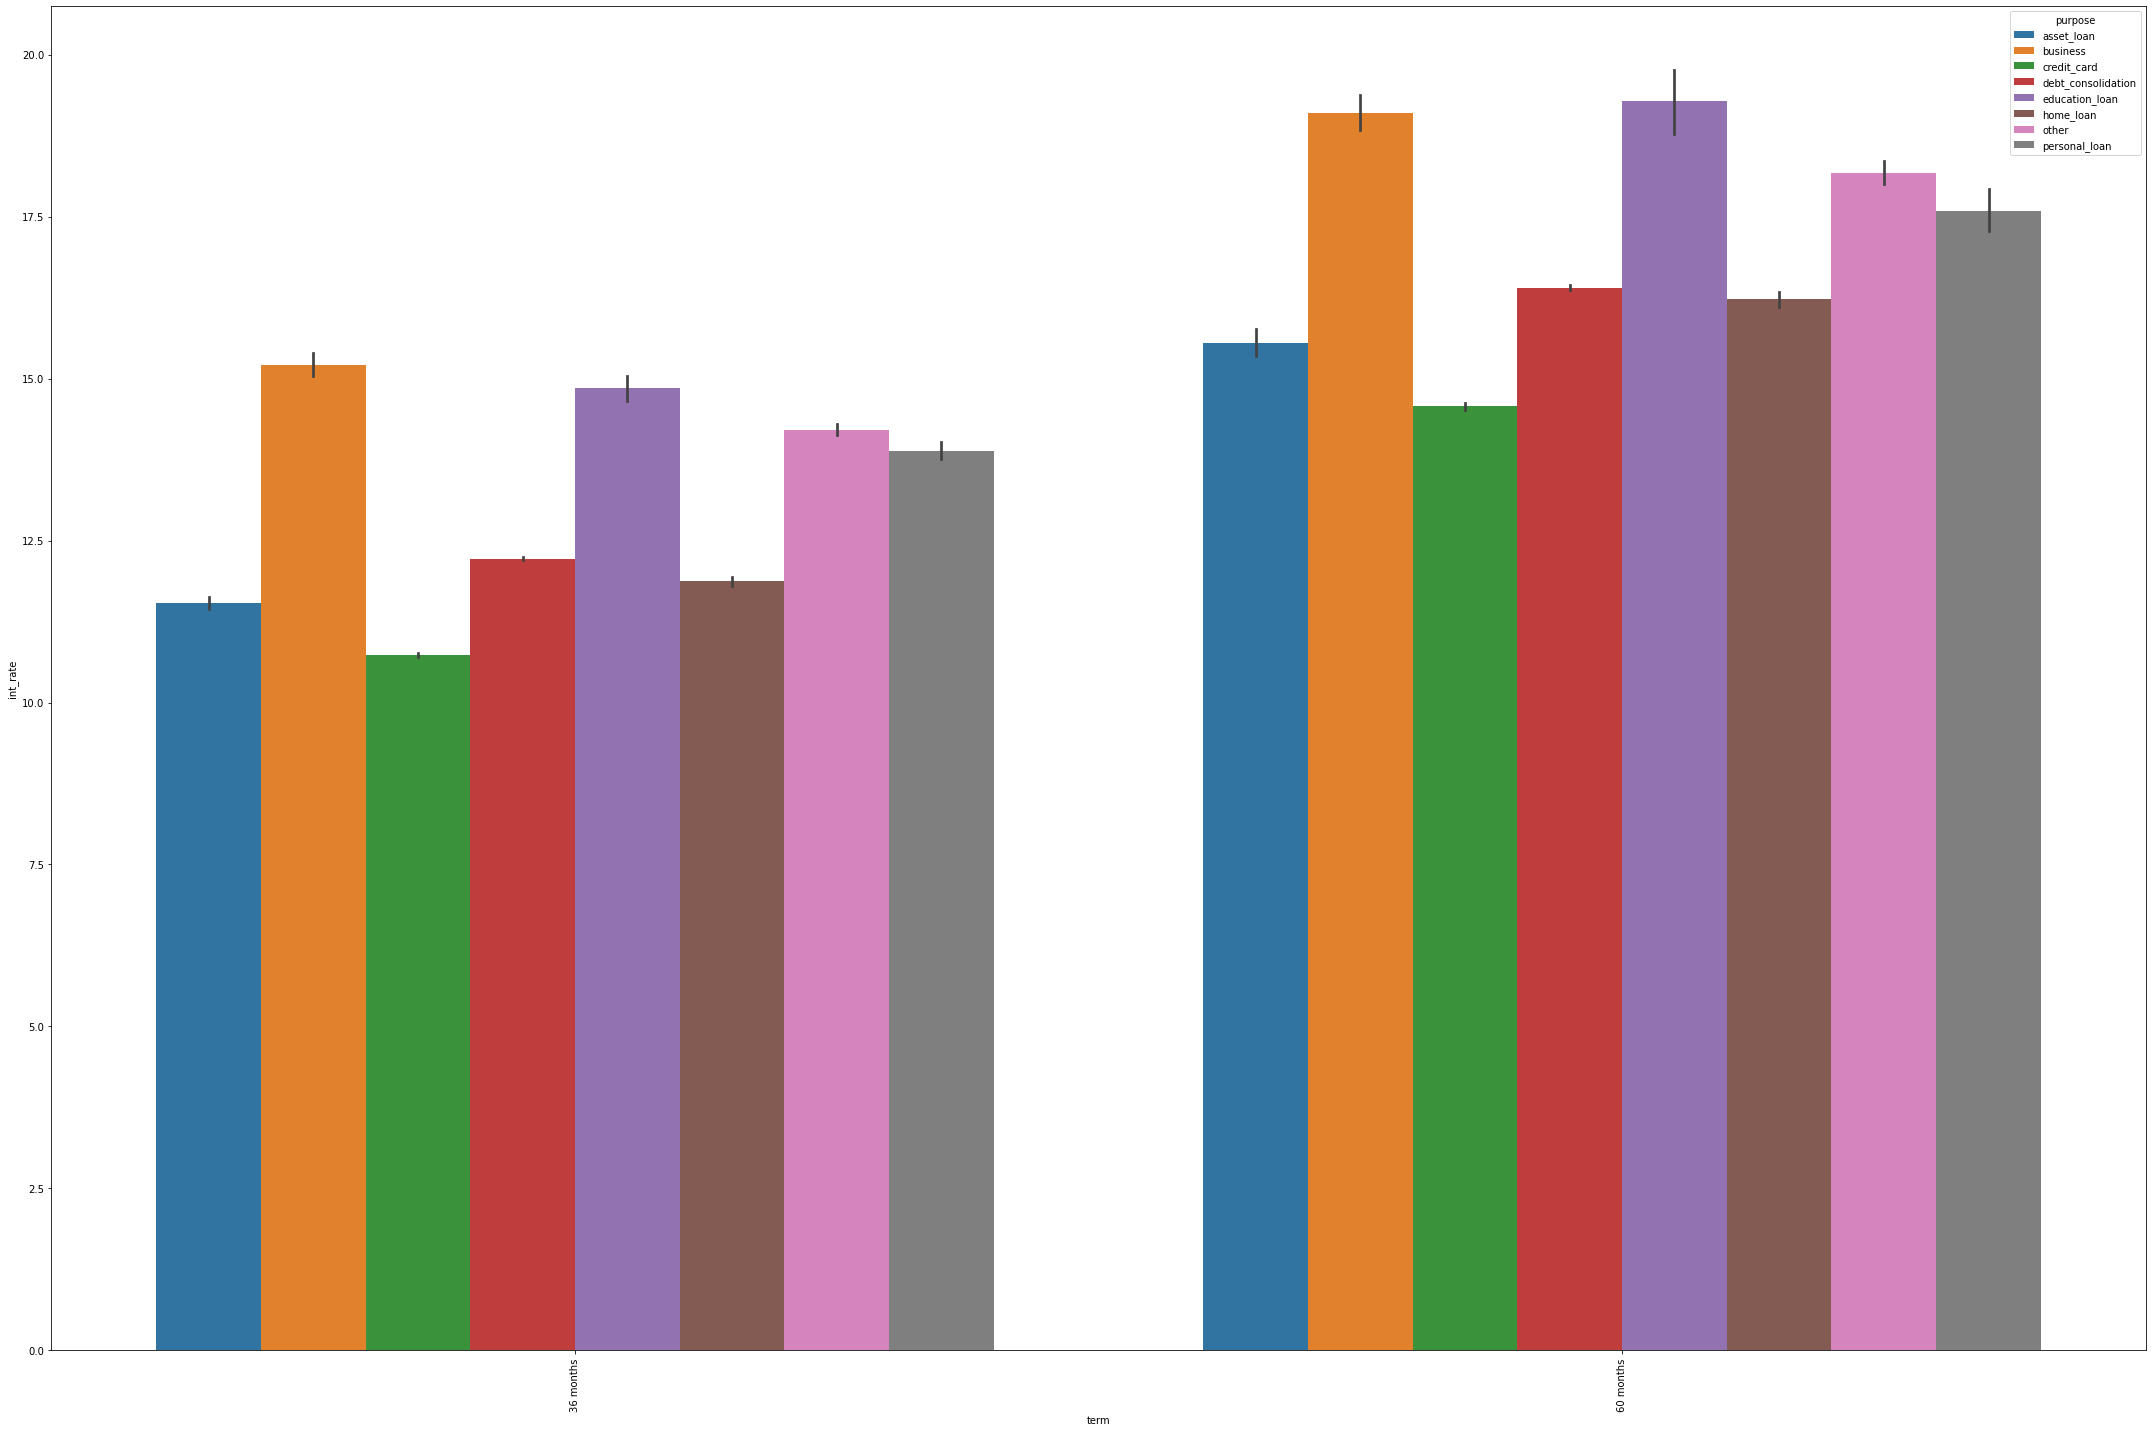

In [296]:
plt.figure(figsize=(30,20))
sns.barplot(x=df['term'],y=df['int_rate'],hue=df['purpose'].sort_values())
plt.xticks(rotation=90)
plt.tight_layout()
#we can see the interest rate variation based on term and purpose for which loan was taken

In [297]:
#we can see that people with lower credit balance tend to default more

In [298]:
df.head(2)


,member_id,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,36 months,19.19,E,9,OWN,28700.0,Source Verified,debt_consolidation,33.88,0.0,1.0,14.0,1.0,73.1,f,1173.84,0.0,0.0,0.0,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,36 months,10.99,B,0,MORTGAGE,65000.0,Source Verified,home_loan,3.64,0.0,1.0,6.0,0.0,23.2,w,83.95,0.0,0.0,0.0,0.0,0.0,9974.0,32900.0,0


In [299]:
df.drop(['member_id'],axis=1,inplace=True)

In [300]:
print(df.shape)

(270000, 25)


<AxesSubplot:title={'center':'Correlation with target'}>

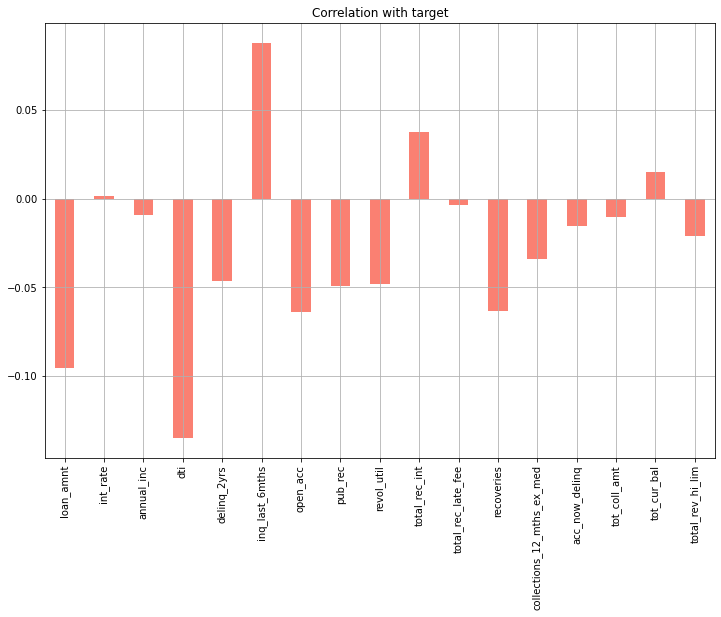

In [301]:
df['loan_status'] = df['loan_status'].astype('int')
df.drop('loan_status', axis=1).corrwith(df['loan_status']).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with target",color="salmon")


In [302]:
df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,14350,36 months,19.19,E,9,OWN,28700.0,Source Verified,debt_consolidation,33.88,0.0,1.0,14.0,1.0,73.1,f,1173.84,0.0,0.0,0.0,0.0,0.0,28699.0,30800.0,0
1,4800,36 months,10.99,B,0,MORTGAGE,65000.0,Source Verified,home_loan,3.64,0.0,1.0,6.0,0.0,23.2,w,83.95,0.0,0.0,0.0,0.0,0.0,9974.0,32900.0,0
2,10000,36 months,7.26,A,2,OWN,45000.0,Not Verified,debt_consolidation,18.42,0.0,0.0,5.0,0.0,31.2,w,56.47,0.0,0.0,0.0,0.0,65.0,38295.0,34900.0,0
3,15000,36 months,19.72,D,10,RENT,105000.0,Not Verified,debt_consolidation,14.97,0.0,2.0,10.0,0.0,55.5,f,4858.62,0.0,0.0,0.0,0.0,0.0,55564.0,24700.0,0
4,16000,36 months,10.64,B,10,RENT,52000.0,Verified,credit_card,20.16,0.0,0.0,11.0,0.0,76.2,w,2296.41,0.0,0.0,0.0,0.0,0.0,47159.0,47033.0,0


In [303]:
print(df.kurtosis())

loan_amnt                        -0.259767
int_rate                         -0.151731
emp_length                       -1.474675
annual_inc                     5105.649233
dti                              -0.224051
delinq_2yrs                      55.477688
inq_last_6mths                    8.966567
open_acc                          3.128162
pub_rec                         306.582582
revol_util                        4.860857
total_rec_int                    11.877372
total_rec_late_fee              622.052145
recoveries                      459.405876
collections_12_mths_ex_med      929.141025
acc_now_delinq                  541.907272
tot_coll_amt                  15529.130461
tot_cur_bal                      16.460053
total_rev_hi_lim              19863.746194
loan_status                      -0.459922
dtype: float64


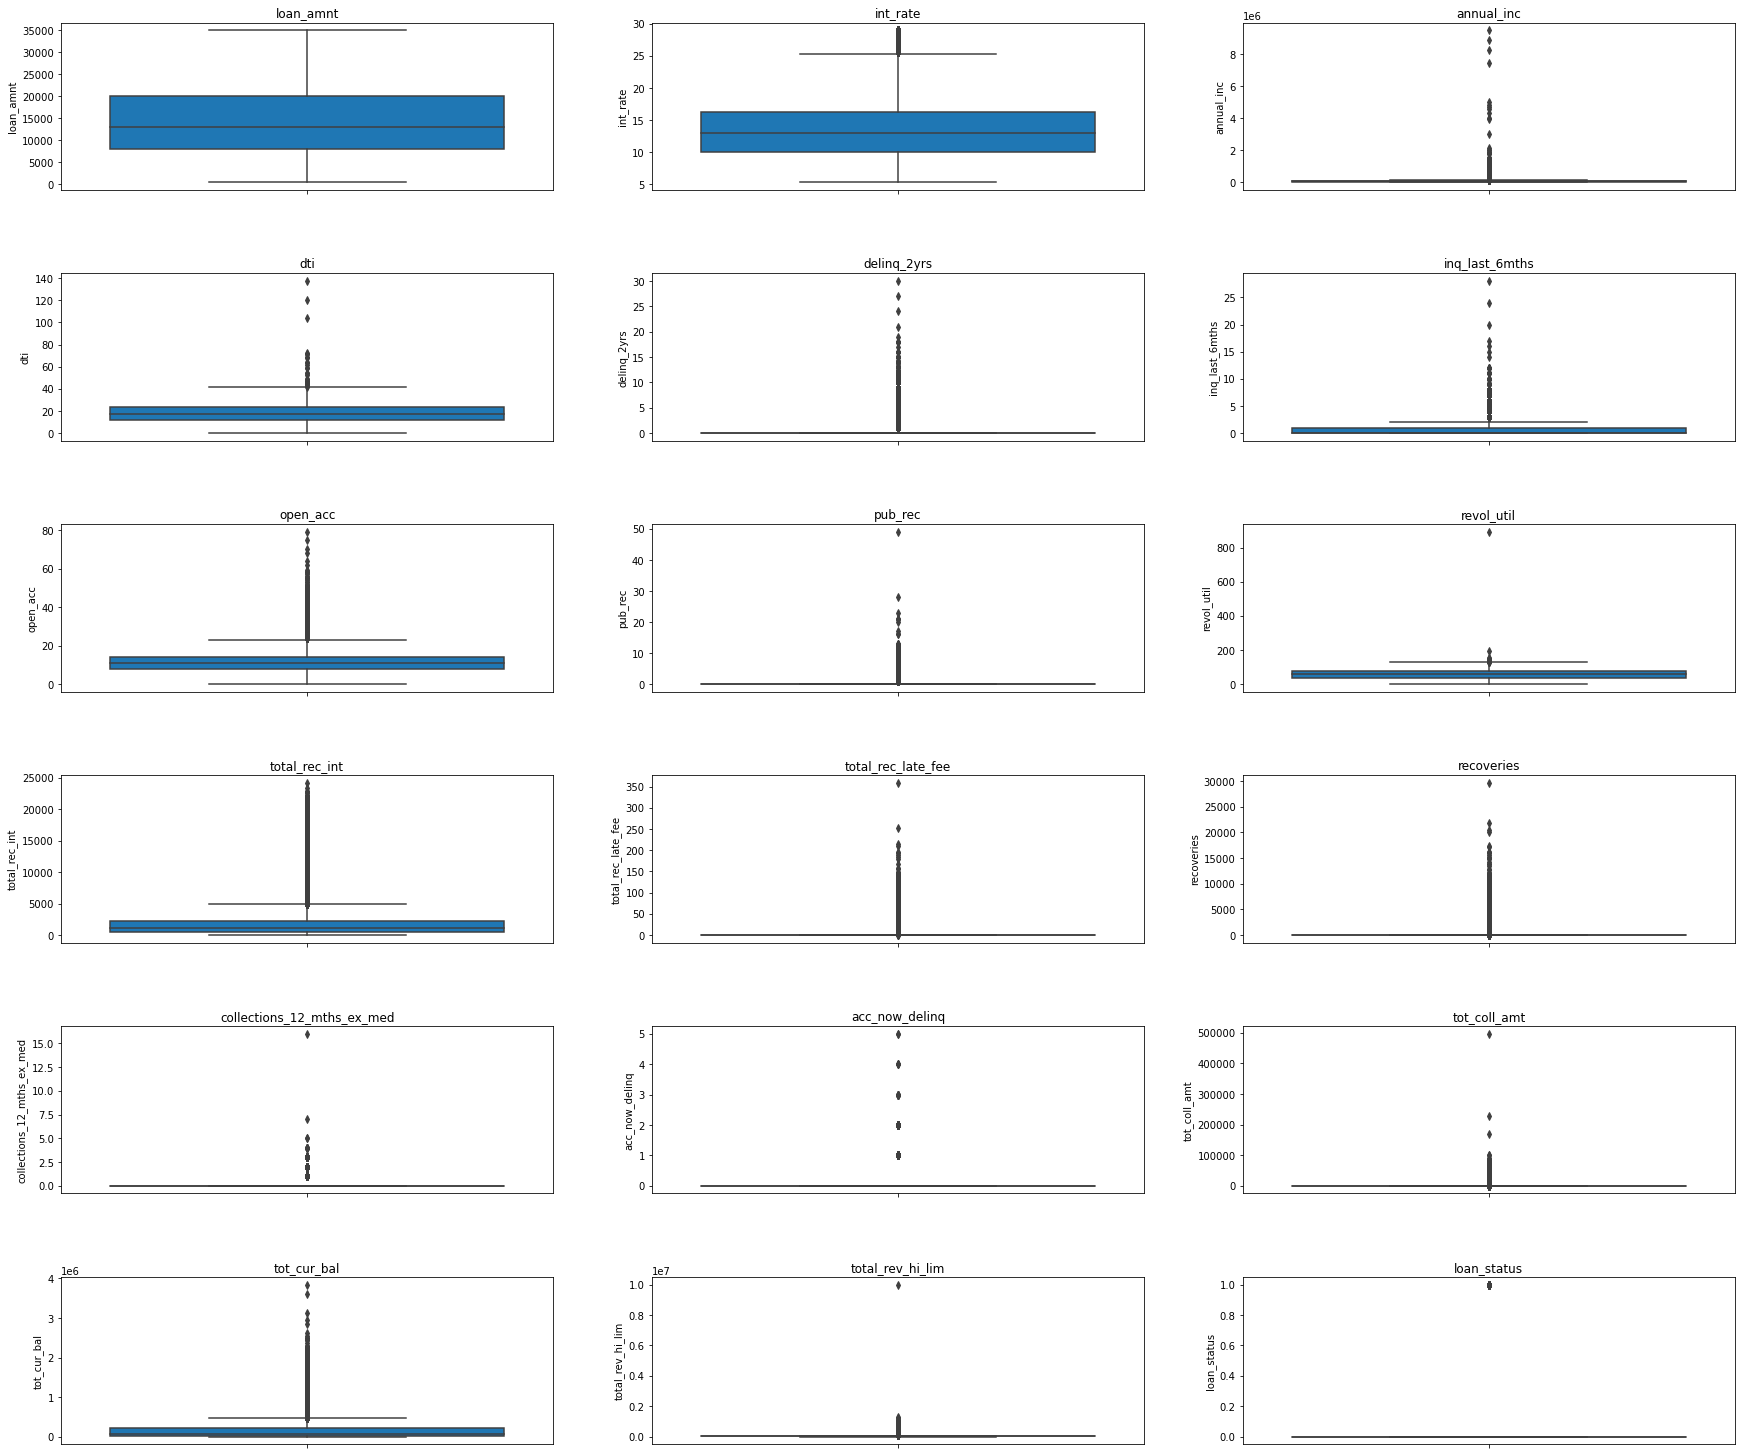

In [304]:
#plot outliers:
df_num = df.select_dtypes(exclude='object')
plt.subplots(figsize=(30,40))
col =df_num.columns
lenght = len(col)
for i, j in zip(col, range(lenght)):
    plt.subplot((lenght/2),3, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.5)
    sns.boxplot(y=df[i],saturation=1)
    plt.title(i)
    plt.ticklabel_format()
    plt.xticks(rotation=90)



In [305]:
#% outliers
df_num = df.select_dtypes(exclude='object')
for k, v in df_num.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df_num)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column loan_amnt outliers = 0.00%
Column int_rate outliers = 0.70%
Column annual_inc outliers = 4.51%
Column dti outliers = 0.01%
Column delinq_2yrs outliers = 100.00%
Column inq_last_6mths outliers = 6.08%
Column open_acc outliers = 3.93%
Column pub_rec outliers = 100.00%
Column revol_util outliers = 0.01%
Column total_rec_int outliers = 7.21%
Column total_rec_late_fee outliers = 100.00%
Column recoveries outliers = 100.00%
Column collections_12_mths_ex_med outliers = 99.98%
Column acc_now_delinq outliers = 100.00%
Column tot_coll_amt outliers = 92.08%
Column tot_cur_bal outliers = 3.08%
Column total_rev_hi_lim outliers = 5.28%
Column loan_status outliers = 100.00%


In [306]:
#lets see if these are really anomally values or mathemtical outliers
df[['delinq_2yrs','pub_rec','total_rec_late_fee','collections_12_mths_ex_med','acc_now_delinq','tot_coll_amt']].quantile(np.arange(0.0, 1.0, 0.1), axis = 0)

#all these colums had huge outliers because the data set contains 0 values for mostthese distribution 


,delinq_2yrs,pub_rec,total_rec_late_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt
0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.1,0.0,0.0,0.0,0.0,0.0,0.0
0.2,0.0,0.0,0.0,0.0,0.0,0.0
0.3,0.0,0.0,0.0,0.0,0.0,0.0
0.4,0.0,0.0,0.0,0.0,0.0,0.0
0.5,0.0,0.0,0.0,0.0,0.0,0.0
0.6,0.0,0.0,0.0,0.0,0.0,0.0
0.7,0.0,0.0,0.0,0.0,0.0,0.0
0.8,0.0,0.0,0.0,0.0,0.0,0.0
0.9,1.0,1.0,0.0,0.0,0.0,157.0


In [307]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        #1st quartile
        Q1 = np.percentile(df[c],25)
        #3rd quartile
        Q3 = np.percentile(df[c],75)
        #IQR
        IQR = Q3-Q1
        #Outlier Step
        outlier_step= IQR * 1.5
        #Detect outlier and their indices
        outlier_list_col = df[(df[c]<Q1 - outlier_step) | (df[c]> Q3 + outlier_step)].index
        #store indices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 0)
    
    return multiple_outliers
df.loc[detect_outliers(df,['delinq_2yrs','pub_rec','total_rec_late_fee','collections_12_mths_ex_med','acc_now_delinq','tot_coll_amt'])]

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
47,20000,36 months,13.67,B,4,RENT,168000.0,Verified,debt_consolidation,22.32,0.0,0.0,5.0,0.0,80.0,f,4255.21,68.040000,750.11,0.0,0.0,NaN,NaN,NaN,0
91,17000,60 months,23.40,E,10,RENT,54000.0,Source Verified,debt_consolidation,18.89,0.0,2.0,15.0,0.0,77.0,f,6163.79,24.160000,0.00,0.0,0.0,0.0,35398.0,19000.0,1
93,8000,36 months,10.38,B,2,RENT,50004.0,Verified,other,23.88,0.0,2.0,8.0,0.0,57.5,f,330.23,29.950575,318.09,0.0,0.0,NaN,NaN,NaN,0
188,20000,60 months,14.49,C,7,OWN,140000.0,Source Verified,debt_consolidation,23.96,0.0,1.0,10.0,0.0,82.4,w,2923.39,23.520000,0.00,0.0,0.0,0.0,381762.0,47700.0,0
203,6000,36 months,18.25,D,10,RENT,390000.0,Source Verified,debt_consolidation,3.74,1.0,4.0,13.0,0.0,47.2,f,1519.79,15.000000,0.00,0.0,0.0,670.0,36054.0,10700.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269731,8325,36 months,6.62,A,6,MORTGAGE,44000.0,Verified,debt_consolidation,16.06,0.0,1.0,19.0,0.0,17.4,f,863.35,15.000000,0.00,0.0,0.0,0.0,251986.0,17500.0,1
269772,7750,36 months,12.35,B,10,MORTGAGE,65000.0,Verified,debt_consolidation,30.74,0.0,5.0,12.0,0.0,87.5,w,1492.81,15.000000,0.00,0.0,0.0,0.0,310872.0,36240.0,0
269841,35000,36 months,7.89,A,5,MORTGAGE,180000.0,Verified,credit_card,16.15,0.0,0.0,12.0,0.0,54.9,w,1384.11,69.750000,0.00,0.0,0.0,0.0,478184.0,62400.0,0
269876,35000,36 months,18.55,D,7,OWN,180000.0,Verified,home_loan,21.30,0.0,1.0,23.0,0.0,61.3,f,9967.78,63.750000,0.00,0.0,0.0,0.0,1016592.0,187500.0,0


so we can see 3806 values from those high% outlier cols values these are not really annlomalies 

In [308]:
#Encoding cat features 
df['term'].replace({'36 months':0,'60 months':1},inplace=True)
df['grade'].replace({'A':6, 'B':5, 'C':4, 'D':3, 'E':2, 'F':1, 'G':0},inplace=True)
df = pd.get_dummies(data=df,columns=['verification_status','purpose','initial_list_status','home_ownership'],drop_first=True)


In [309]:
#impute missing values
df.isnull().sum()

loan_amnt                                  0
term                                       0
int_rate                                   0
grade                                      0
emp_length                             13630
annual_inc                                 2
dti                                        0
delinq_2yrs                                6
inq_last_6mths                             6
open_acc                                   6
pub_rec                                    6
revol_util                               148
total_rec_int                              0
total_rec_late_fee                         0
recoveries                                 0
collections_12_mths_ex_med                42
acc_now_delinq                             6
tot_coll_amt                           21383
tot_cur_bal                            21383
total_rev_hi_lim                       21383
loan_status                                0
verification_status_Source Verified        0
verificati

In [310]:

x= df.drop('loan_status',axis=1)
y =df['loan_status']
print(x.shape,y.shape)

(270000, 32) (270000,)


In [311]:

itr_imputer =IterativeImputer(estimator=ExtraTreesRegressor(),max_iter=3, random_state=42)

In [312]:
#start=time.process_time()
#itr_imputer.fit(x) 
#end =time.process_time()
#print('Processing Time :',end-start)
#This takes Huge time to compute so i have run this and store the result for future use

In [313]:
#x= itr_imputer.transform(x)

In [314]:
cols= ['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim','own', 'rent',
       'Source Verified', 'Verified', 'business_loan', 'credit_card',
       'debt_consolidation', 'edu_loan', 'home_loan', 'other_loan',
       'persnl_loan', 'initial_list_status_w']

In [315]:
#x = pd.DataFrame(x,columns=cols)

In [316]:
#x.to_csv('independent_features_imputed.csv',index=False)

In [317]:
x= pd.read_csv('independent_features_imputed.csv')# Reading the imputed and stored values 

In [318]:
x.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
grade                         0
emp_length                    0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_util                    0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
own                           0
rent                          0
Source Verified               0
Verified                      0
business_loan                 0
credit_card                   0
debt_consolidation            0
edu_loan                      0
home_loan                     0
other_loan                    0
persnl_loan                   0
initial_

In [319]:
#split train test split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.4,stratify=y,random_state=14)

In [320]:
#scaling
scl = StandardScaler() 
#scl the feature based on mean and std ...i have preferd standrisation coz features can take form of normal distribution
#this will make models to learn weights easily and also will make less sentive to outliers 
scl.fit(xtrain)

StandardScaler()

In [321]:
xtrain_scl = pd.DataFrame(scl.transform(xtrain))
xtest_scl = pd.DataFrame(scl.fit_transform(xtest))
xtest_scl.columns = xtest.columns 
xtrain_scl.columns = xtrain.columns 

In [322]:
xtrain_scl.head()


,loan_amnt,term,int_rate,grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_rec_int,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,own,rent,Source Verified,Verified,business_loan,credit_card,debt_consolidation,edu_loan,home_loan,other_loan,persnl_loan,initial_list_status_w
0,0.027470,1.527031,0.763301,-0.915985,-1.678725,-0.415154,0.240006,-0.360072,0.304967,-1.041595,-0.339575,-0.150079,-0.167474,-0.096226,-0.116511,-0.106482,-0.063714,-0.121472,-0.762874,-0.778378,3.028960,-0.820366,1.298490,-0.696927,-0.110866,-0.54945,0.828118,-0.080498,-0.257259,-0.223952,-0.133867,-0.972778
1,1.568386,1.527031,1.767814,-1.677773,-1.119289,0.660488,-1.076622,0.778389,2.312381,-0.479067,-0.339575,-0.769222,0.499870,-0.096226,-0.116511,-0.106482,-0.063714,-0.121472,-0.778021,-0.369031,-0.330146,1.218968,1.298490,-0.696927,-0.110866,-0.54945,-1.207558,-0.080498,-0.257259,-0.223952,-0.133867,-0.972778
2,-0.565190,-0.654865,-0.629320,0.607592,0.838736,1.683176,-1.710287,-0.360072,0.304967,-1.604123,1.415124,1.167691,-0.439953,-0.096226,-0.116511,-0.106482,-0.063714,-0.121472,-0.436806,-0.839619,-0.330146,-0.820366,-0.770125,1.434871,-0.110866,-0.54945,0.828118,-0.080498,-0.257259,-0.223952,-0.133867,1.027984
3,0.146002,1.527031,1.030410,-0.915985,-0.000417,-0.133832,0.821967,-0.360072,2.312381,-0.291558,-0.339575,-0.279764,1.589929,-0.096226,-0.116511,-0.106482,-0.063714,-0.121472,-0.227489,-0.220763,-0.330146,1.218968,1.298490,-0.696927,-0.110866,-0.54945,0.828118,-0.080498,-0.257259,-0.223952,-0.133867,-0.972778
4,0.620130,1.527031,0.283874,-0.154196,0.000670,-0.419291,1.795911,0.778389,-0.698740,-0.479067,-0.339575,-1.053693,0.635059,-0.096226,-0.116511,-0.106482,-0.063714,-0.121472,0.381004,-0.597878,-0.330146,-0.820366,-0.770125,1.434871,-0.110866,-0.54945,0.828118,-0.080498,-0.257259,-0.223952,-0.133867,1.027984


In [323]:
#Multicolinarity check using VIF

vif = pd.DataFrame()
X =  pd.DataFrame(xtrain_scl)
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#A rule of thumb for interpreting the variance inflation factor:

#1 = not correlated.
#Between 1 and 5 = moderately correlated.
#Greater than 5 = highly correlated.

,Features,VIF
2,int_rate,13.46
3,grade,12.21
26,debt_consolidation,8.99
25,credit_card,7.17
28,home_loan,3.00
29,other_loan,2.56
0,loan_amnt,2.12
12,total_rec_int,1.97
18,tot_cur_bal,1.81
23,Verified,1.63


In [324]:
xtrain_scl.drop('int_rate',axis=1,inplace=True)
xtest_scl.drop('int_rate',axis=1,inplace=True)

In [325]:
vif = pd.DataFrame()
X =  pd.DataFrame(xtrain_scl)
vif['Features'] = xtrain_scl.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,debt_consolidation,8.98
24,credit_card,7.17
27,home_loan,3.00
28,other_loan,2.56
0,loan_amnt,2.08
2,grade,1.82
17,tot_cur_bal,1.81
11,total_rec_int,1.77
22,Verified,1.62
1,term,1.59


In [326]:
vif = pd.DataFrame()
X =  pd.DataFrame(xtrain_scl)
vif['Features'] = xtrain_scl.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,debt_consolidation,8.98
24,credit_card,7.17
27,home_loan,3.00
28,other_loan,2.56
0,loan_amnt,2.08
2,grade,1.82
17,tot_cur_bal,1.81
11,total_rec_int,1.77
22,Verified,1.62
1,term,1.59


In [327]:
xtrain_scl.drop('debt_consolidation',axis=1,inplace=True)
xtest_scl.drop('debt_consolidation',axis=1,inplace=True)

### Use PCA to get rid of this, else w should use loop ( Iterative one) to ensure that all the features are below the threshold 

In [328]:
lr = LogisticRegression()

In [329]:

lr.fit(xtrain_scl,ytrain)

LogisticRegression()

In [330]:
pred = lr.predict(xtest_scl)

In [331]:
print('Training Score',lr.score(xtrain_scl,ytrain))
print('Testing Score',lr.score(xtest_scl,ytest))

Training Score 0.7747469135802469
Testing Score 0.7738055555555555


In [332]:
#metrices
def metrices(xtrain_data,ytrain_data,model,xtest_data,ytest_data):
    lst = []
    pred = model.predict(xtest_data)
    acc = accuracy_score(ytest_data,pred)
    test_score = model.score(xtest_data,ytest_data)
    train_score = model.score(xtrain_data,ytrain_data)
    tn, fp, fn, tp = confusion_matrix(ytest_data,pred).ravel()
    lr_recall = round(tp/(tp+fn), 3)   #out of all actuall defaulters ,how many were reconised as defaulter
    lr_precision = round(tp/(tp+fp), 3) #out of all prediced as defaulter , how many did actually default
    lr_specificity =round(tn/(tn+fp),3)  #out of all non defaulter ,how many were reconised as non defaulter 
    type_1_error = fp    
    type_2_error = fn  
    lst.append([lr_recall, lr_precision, lr_specificity, type_1_error, type_2_error,train_score,test_score])
    return lst
metrices(xtrain_scl,ytrain,lr,xtest_scl,ytest)

[[0.124, 0.605, 0.975, 2066, 22363, 0.7747469135802469, 0.7738055555555555]]

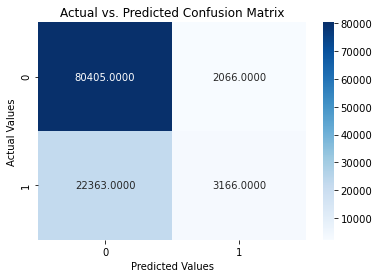

In [333]:
cm = confusion_matrix(ytest,pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='.4f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [334]:
print(classification_report(ytest,pred))


              precision    recall  f1-score   support

           0       0.78      0.97      0.87     82471
           1       0.61      0.12      0.21     25529

    accuracy                           0.77    108000
   macro avg       0.69      0.55      0.54    108000
weighted avg       0.74      0.77      0.71    108000



In [ ]:
#so we see precision and accuracy are decent but recall for predicting defaulter is very less
#for instance out of 100 actuall defaulters ,13  were reconised as defaulter
#and for every 100 predicted to default  ,60 were  did actually default


In [335]:
result = pd.DataFrame({'Model' : ['Logistic Regression'], 'Accuracy' : [0.77], 'Precision' : [0.57],
                      'True positive rate' : [0.15], 'True negative rate' : [0.97],
                       'False positive rate' :  [1-0.97]})
result


,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.77,0.57,0.15,0.97,0.03


AUC: 0.735


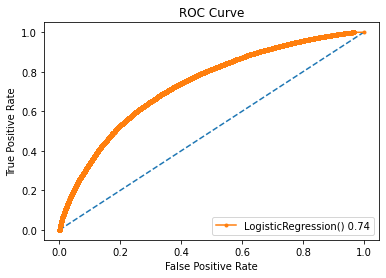

In [336]:
#AOC
def aoc(model,xtest_data,ytest_data):
    probs = model.predict_proba(xtest_data)
# keep probabilities for the positive outcome only
    probs = probs[:, 1]
# calculate AUC
    auc = roc_auc_score(ytest_data, probs)
    print('AUC: %.3f' % auc)
# calculate roc curve
    fpr, tpr, thresholds = roc_curve(ytest_data, probs)
# plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.',label='{} {}'.format(model,np.round(auc,2)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
   # show the plot
    plt.show()
aoc(lr,xtest_scl,ytest)

In [ ]:
#As there is imbalnce in dependent feature ,lets try to balance the dataset see if this imporves the recall 

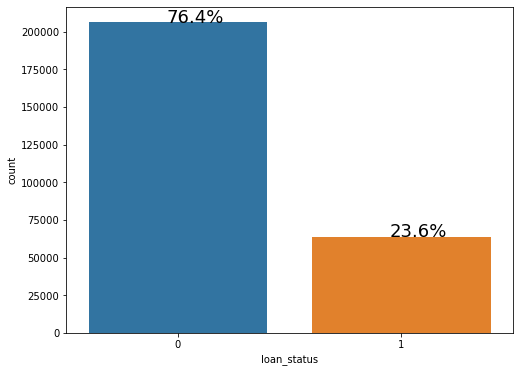

In [337]:
def plt_percente(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 18)
    plt.show()
plt.subplots(figsize=(8,6))
ax = sns.countplot(data=df, x='loan_status');

plt_percente(ax, df.loan_status)

In [338]:
from imblearn.over_sampling import SMOTE

In [339]:
x.drop(['debt_consolidation','int_rate'],axis=1,inplace=True)#VIF analysis we have removed these 2 features 

In [ ]:
oversample =  SMOTE(sampling_strategy= 'minority', random_state= 1 )
xtrain_scl_1, ytrain_1 = oversample.fit_resample(xtrain_scl, ytrain)


In [340]:
ytrain.value_counts()

0    123707
1     38293
Name: loan_status, dtype: int64

In [341]:
ytrain_1.value_counts()

1    123707
0    123707
Name: loan_status, dtype: int64

In [342]:
lr1 = LogisticRegression()

In [343]:
lr1.fit(xtrain_scl_1,ytrain_1)

LogisticRegression()

In [344]:
print(metrices(xtrain_scl_1,ytrain_1,lr1,xtest_scl,ytest))


[[0.678, 0.39, 0.673, 27008, 8228, 0.6784054257236858, 0.6737407407407408]]


In [345]:
result.loc[1] = [f'Logistic Regression_SMOTE',0.678 , 0.39, 0.68, 0.67, 1-0.67]
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.770,0.57,0.15,0.97,0.03
1,Logistic Regression_SMOTE,0.678,0.39,0.68,0.67,0.33


              precision    recall  f1-score   support

           0       0.87      0.67      0.76     82471
           1       0.39      0.68      0.50     25529

    accuracy                           0.67    108000
   macro avg       0.63      0.68      0.63    108000
weighted avg       0.76      0.67      0.70    108000



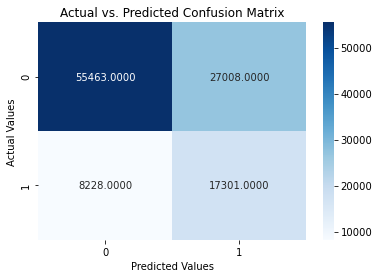

In [346]:
pred = lr1.predict(xtest_scl)
print(classification_report(ytest,pred))
cm = confusion_matrix(ytest,pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='.4f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [ ]:
aoc(lr1,xtest_scl,ytest)

In [ ]:
#We can see that accuracy and precision has decreased ,but recall to recongnise defaulter and non defaulter has increased dratically
#but this will affect our predcitions to predict a defaulter are way to low 


In [ ]:
#lets use the origina data and use different models to see if find optimaila performance and metrices 


In [347]:
#Random forest is giving us good accuracy and metrices
#(Random Forest     0.999988    0.772278 0.785583 0.050374  0.094677  )
#there is overfitting and we can find the optimal parameters using hyperparamneter tunning 
#But to run the remaing modles which are computaionaly heavy and take long duration so we need to try  dimensionality-reduction

In [348]:
pca = PCA(n_components=7)
pca.fit(xtrain_scl)
Xtrain_PCA = pca.transform(xtrain_scl)
Xtest_PCA = pca.transform(xtest_scl)
Xtrain_PCA.shape

(162000, 7)

In [349]:
pca.explained_variance_ratio_

array([0.09608892, 0.06997525, 0.05244772, 0.04908853, 0.0455251 ,
       0.04223877, 0.03774921])

In [350]:
PC = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7']

Text(0.5, 1.0, 'Variation covered by the PC Components')

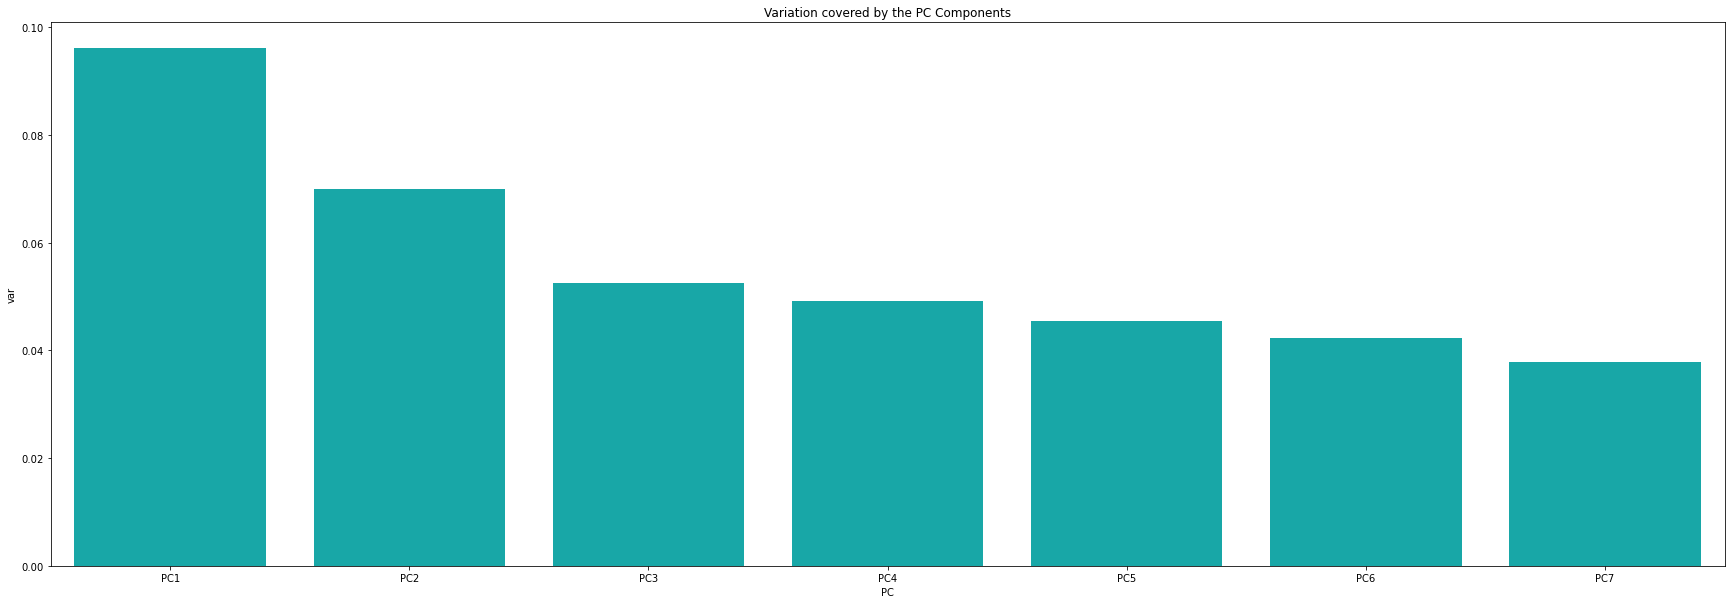

In [351]:
pca_df = pd.DataFrame({'var':pca.explained_variance_ratio_, 'PC':PC})
plt.figure(figsize=(30,10))
sns.barplot(x='PC',y="var", data=pca_df, color="c")
plt.title('Variation covered by the PC Components')

### How did you decide to go ahead with only 7 PC. Use % cummulative explained variance and find for atleat 90-95% explained variance 

In [ ]:
#Since very High variance in 7 PC to all columns, takingall 7PC axis columns into consideration


In [352]:
#Store the results 
#df_results.to_csv('Classifiers results.csv',index=False)

In [353]:
df_results = pd.read_csv('Classifiers results.csv')#computation will take huge time ,store and read results for reuasbility 
df_results

,classifier,train_score,test_score,Precision_score,Recall_score,F1_score,training_time
0,Logistic Regression,0.763457,0.763398,0.493443,0.035372,0.066011,0.250000
1,Decision Tree,1.000000,0.670954,0.315989,0.336598,0.325968,5.093750
2,Random Forest,0.999981,0.772324,0.566516,0.156802,0.245620,112.671875
3,Linear SVM,0.763623,0.763620,0.000000,0.000000,0.000000,1492.343750
4,KNeighbors,0.815549,0.741407,0.425594,0.268753,0.329460,30.265625
5,Naive Bayes,0.765062,0.765102,0.561728,0.028517,0.054278,0.125000


In [354]:
# we can see all models have decent accuracy ,let try hyper parmeter tunning and find optimal performace for models

#HyperParameter Tunning

In [355]:
df_temp1 = pd.concat([x,y],axis=1)
df_temp2 = df_temp1.sample(frac=0.25)#I am using only 25% data due to load and limitation of my device for hyperparmanter tunning

In [356]:
x1= df_temp2.drop('loan_status',axis=1)
y1=df_temp2['loan_status']

In [357]:
score = pd.DataFrame(columns=["Model","Best_Score","Best_Params"])

In [358]:
model = LogisticRegression()
solvers = ['sag','saga' 'liblinear']
penalty = ['l2','l1',None]
c_values = [1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x1, y1)

In [359]:
score = pd.read_csv('Hyper_best_param.csv')
score.sort_values('Best_Score',ascending=False)

,Model,Best_Score,Best_Params
1,RandomForestClassifier,0.822805,"{'max_features': 'log2', 'n_estimators': 100, ..."
2,DecisionTreeClassifier,0.821111,"{'criterion': 'gini', 'max_depth': 5, 'min_sam..."
3,SVM,0.791000,"{'kernel': 'rbf', 'c': 0.1, 'gamma': 'scale'}"
0,LogisticRegression,0.761383,"{'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}"


In [ ]:
#lets build model with best paramters for DT and RF


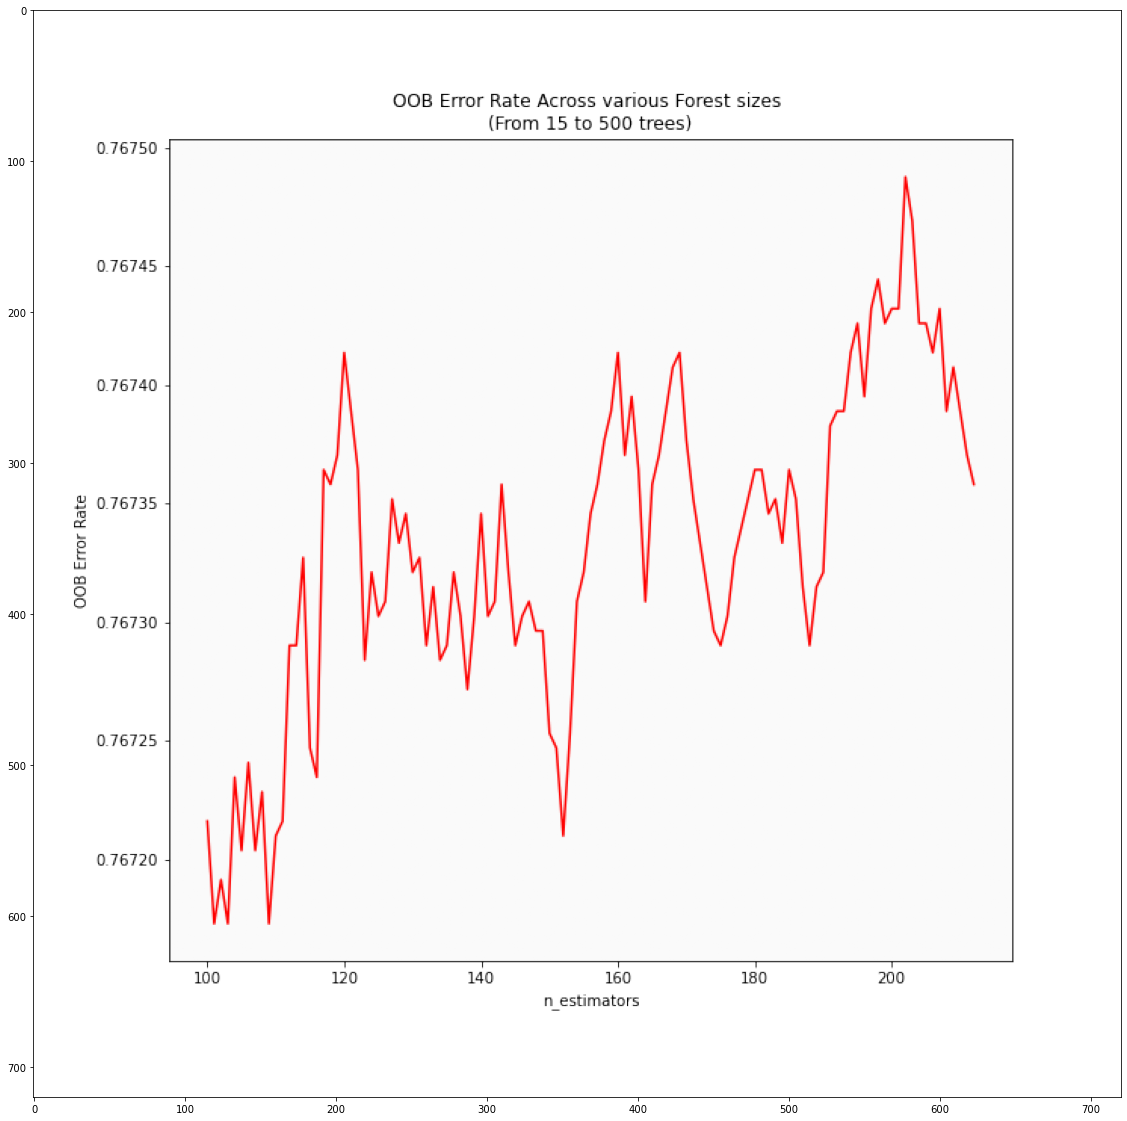

In [360]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
  
# Read Images
img = mpimg.imread('OOB_Error_Rate.png')
plt.figure(figsize=(30,20))
# Output Images
plt.imshow(img)

In [ ]:
#min error is at 110 

In [361]:
rf_prun = RandomForestClassifier(bootstrap=True,max_features='log2',criterion='gini',n_estimators=110,max_depth=20,min_samples_leaf=5)
rf_prun.fit(xtrain_scl,ytrain)


RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=5,
                       n_estimators=110)

In [362]:
print(metrices(xtrain_scl,ytrain,rf_prun,xtest_scl,ytest))

[[0.015, 0.923, 1.0, 31, 25156, 0.827253086419753, 0.766787037037037]]


AUC: 0.774


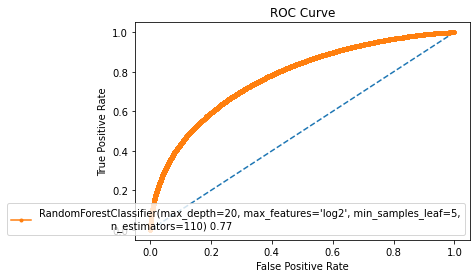

In [363]:
aoc(rf_prun,xtest_scl,ytest)


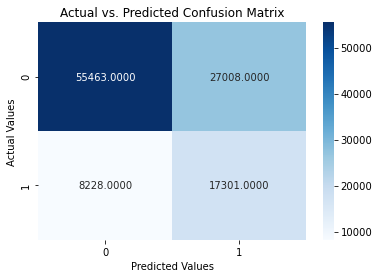

In [364]:
cm = confusion_matrix(ytest,pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='.4f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [365]:
## Calculating feature importance
feature_cols = xtrain_scl.columns
feat_importance = rf_prun.feature_importances_


feat_imp_dict = dict(zip(feature_cols, rf_prun.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
tot_coll_amt,0.144876
tot_cur_bal,0.118828
total_rev_hi_lim,0.118506
total_rec_int,0.082115
initial_list_status_w,0.071913
dti,0.064009
loan_amnt,0.055730
recoveries,0.053558
revol_util,0.051232
annual_inc,0.044979


In [366]:
df_results = pd.read_csv('Classifiers results.csv')#Modeling with PCA 
df_results

,classifier,train_score,test_score,Precision_score,Recall_score,F1_score,training_time
0,Logistic Regression,0.763457,0.763398,0.493443,0.035372,0.066011,0.250000
1,Decision Tree,1.000000,0.670954,0.315989,0.336598,0.325968,5.093750
2,Random Forest,0.999981,0.772324,0.566516,0.156802,0.245620,112.671875
3,Linear SVM,0.763623,0.763620,0.000000,0.000000,0.000000,1492.343750
4,KNeighbors,0.815549,0.741407,0.425594,0.268753,0.329460,30.265625
5,Naive Bayes,0.765062,0.765102,0.561728,0.028517,0.054278,0.125000


In [367]:
score = pd.read_csv('Hyper_best_param.csv') #Hyper parameter ty=unning using 25%data 
score.sort_values('Best_Score',ascending=False)

,Model,Best_Score,Best_Params
1,RandomForestClassifier,0.822805,"{'max_features': 'log2', 'n_estimators': 100, ..."
2,DecisionTreeClassifier,0.821111,"{'criterion': 'gini', 'max_depth': 5, 'min_sam..."
3,SVM,0.791000,"{'kernel': 'rbf', 'c': 0.1, 'gamma': 'scale'}"
0,LogisticRegression,0.761383,"{'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}"


In [368]:
results = pd.read_csv('Results')#Final Modelling results for base models and best model
results

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.770,0.570,0.150,0.97,0.03
1,Logistic Regression_SMOTE,0.678,0.390,0.680,0.67,0.33
2,Random Forest,0.750,0.200,0.340,0.84,0.16
3,Random Forest_SMOTE,0.710,0.530,0.420,0.48,0.52
4,Random Forest_HP,0.780,0.019,0.943,1.00,0.00


#Conclusion:

Loan amount ,funded amount and funded amount by investor are having almost same values only very few cases the funded amounts varied from loan amount which has led to high correlation between these features.

Open-end credit is a preapproved loan between a bank and borrower that may be used repeatedly up to a certain limit.More the inquires or derogotary public records will effec the can affect credit score.This will help in predciting defaulters .

Lesser loan term is preferred by custoemrs but they are more likely to repay in the duration and become defaulter .

In our data we have 24% have loan defaulters.

Most of the customer applyin for loans belongs to groups B,C and then A,D grade, these group characterstics can been used to target more customer to apply loans.

Customers with motagae property are less changes to default also most customer are having loan  in this catogires with higher term period.

Verficiation process is one major loop where non verified and  also verifed are defaluting  compared to source verified ,so verified group bacground checks can be imporved  .

Large number of default in area code LA and LA, application from these regions needs to be verified properly.

Customers applying loan for credit card and debt repay loans are more likely to default.

10+years expecienced people are seems to be most applying the loans and less chances of default but below 1 years work exp are more likely to default.

We have random forest model as it is giving good accuracy ,less overfiiting and good recall, we need to find a balance using F1 score which will help in better precision.

We have also good predictore features for the RF model.


#Improvemnets  

Imbalanced data handling can be focused and improved .

Try to Apply Neural Network models and Ensemble techiques to get better predictions

Better Hyperparameter techniqies can be tried to imporve the accuracy 

Improve the knowledge on domain to interpret better insights and recommadations.

Need to work with complete data to get better model and results

